In [2]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
df = pd.read_csv("api_method_desc.csv")

In [4]:
df

,Unnamed: 0,api_method,api_method_desc
0,0,javax.swing.AbstractAction.getValue,Gets the Object associated with the specified ...
1,1,javax.swing.AbstractAction.putValue,Sets the Value associated with the specified key.
2,2,javax.swing.AbstractAction.isEnabled,Returns true if the action is enabled.
3,3,javax.swing.AbstractAction.setEnabled,Sets whether the Action is enabled. The defaul...
4,4,javax.swing.AbstractAction.getKeys,Returns an array of Objects which are keys for...
...,...,...,...
31731,31731,org.omg.PortableServer._ServantActivatorStub.e...,This operation is invoked whenever a servant f...
31732,31732,org.omg.PortableServer._ServantActivatorStub._ids,Description copied from class: ObjectImpl
31733,31733,org.omg.PortableServer._ServantLocatorStub.pre...,This operations is used to get a servant that ...
31734,31734,org.omg.PortableServer._ServantLocatorStub.pos...,This operation is invoked whenener a servant c...


In [5]:
api_method_desc_list = df["api_method_desc"].to_list()

In [6]:
# for s in api_method_desc_list:
#     print(s.split(".")[0])
desc_list = sorted([s.split(". ")[0] for s in api_method_desc_list])

In [7]:
desc_list = [s for s in desc_list if len(s.split(" "))<=14]

In [30]:
desc_list = [s for s in desc_list if "and" not in s]
desc_list = [s for s in desc_list if "which " not in s]
desc_list = [s for s in desc_list if "whether" not in s]
desc_list = [s for s in desc_list if "when" not in s]
desc_list = [s for s in desc_list if "A " not in s]
desc_list = [s for s in desc_list if "such as " not in s]

desc_list = [s for s in desc_list if "Deprecated" not in s]

In [31]:
lint_ = sorted(list(set(desc_list)))

In [32]:
from nltk import ngrams
import collections
trigrams_list=[]
corpus = " ".join(lint_)
# xgrams = ngrams(corpus.split(), 3)
xgrams = ngrams(corpus.split(), 7)
collections.Counter(xgrams).most_common()

[(('Sets', 'the', 'designated', 'parameter', 'to', 'the', 'given'), 42),
 (('color', 'of', 'the', 'current', 'theme', 'Returns', 'the'), 36),
 (('Returns', 'the', 'hash', 'code', 'value', 'for', 'this'), 35),
 (('primitive', 'conversion.', 'Returns', 'the', 'value', 'of', 'this'), 35),
 (('Returns', 'a', 'copy', 'of', 'this', 'LocalDateTime', 'with'), 25),
 (('a', 'copy', 'of', 'this', 'LocalDateTime', 'with', 'the'), 25),
 (('Returns', 'a', 'copy', 'of', 'this', 'OffsetDateTime', 'with'), 25),
 (('a', 'copy', 'of', 'this', 'OffsetDateTime', 'with', 'the'), 25),
 (('Returns', 'a', 'copy', 'of', 'this', 'ZonedDateTime', 'with'), 25),
 (('a', 'copy', 'of', 'this', 'ZonedDateTime', 'with', 'the'), 25),
 (('Gets', 'the', 'value', 'of', 'the', 'specified', 'field'), 24),
 (('after', 'a', 'widening', 'primitive', 'conversion.', 'Returns', 'the'),
  24),
 (('value', 'Updates', 'the', 'designated', 'column', 'with', 'a'), 23),
 (('the', 'value', 'of', 'the', 'specified', 'field', 'from'), 22),

In [15]:


for line in lint_:
    doc = nlp(line)
    text=""
    pos=""
    tag=""
    dep=""
    
    for idx,token in enumerate(doc):
        text+=token.text+" "
        pos+=token.pos_+" "

        
    print(pos,text)
    

SPACE PROPN NOUN VERB ADP VERB NOUN ADP NOUN    Callback method invoked after marshalling source to XML 
SPACE PROPN NOUN VERB ADP VERB NOUN NOUN ADP NOUN    Callback method invoked after unmarshalling XML data into target 
SPACE PROPN NOUN VERB ADP VERB ADP NOUN ADP NOUN    Callback method invoked before marshalling from source to XML 
SPACE PROPN NOUN VERB ADV VERB ADP NOUN    Callback method invoked before unmarshalling into target 
SPACE VERB DET ADJ PROPN NOUN NOUN ADP DET PROPN NOUN PUNCT    Convert the lexical XSD string argument into a String value . 
SPACE VERB DET NOUN NOUN ADP DET PROPN NOUN PUNCT    Convert the string argument into a BigInteger value . 
SPACE VERB DET NOUN NOUN ADP DET NOUN PUNCT    Convert the string argument into a string . 
SPACE VERB DET NOUN NOUN ADP DET NOUN NOUN PUNCT    Convert the string argument into an int value . 
SPACE VERB DET PROPN NOUN ADP DET NOUN PUNCT    Converts a BigDecimal value into a string . 
SPACE VERB DET PROPN NOUN ADP DET NOUN P

VERB DET NOUN NOUN ADP ADJ NOUN NOUN  Activates the input method for immediate input processing 
ADV VERB DET NOUN NOUN  Actually performs the painting operation 
VERB DET NOUN NOUN NOUN PUNCT  Adapt a SAX2 characters event . 
VERB DET NOUN NOUN NOUN NOUN PUNCT  Adapt a SAX2 end element event . 
VERB DET PROPN NOUN ADJ NOUN NOUN PUNCT  Adapt a SAX2 end prefix mapping event . 
VERB DET X ADJ NOUN NOUN PUNCT  Adapt a SAX2 ignorable whitespace event . 
VERB DET NOUN NOUN NOUN NOUN PUNCT  Adapt a SAX2 processing instruction event . 
VERB DET NOUN VERB NOUN NOUN PUNCT  Adapt a SAX2 skipped entity event . 
VERB DET NOUN NOUN NOUN NOUN PUNCT  Adapt a SAX2 start element event . 
VERB DET NOUN NOUN ADJ NOUN NOUN PUNCT  Adapt a SAX2 start prefix mapping event . 
NOUN NOUN NOUN PUNCT AUX PART VERB  Adapter implementation method ; do not call 
PROPN DET PROPN PART VERB DET ADJ VERB NOUN  Adapts a Collector to perform an additional finishing transformation 
VERB DET NOUN ADP DET NOUN SCONJ PRON AUX

VERB DET NOUN NOUN ADP DET PROPN ADP DET NOUN DET NOUN VERB ADP  Adds a permission object to the PermissionCollection for the class the permission belongs to 
VERB DET NOUN NOUN ADP DET ADJ NOUN ADP NOUN NOUN PUNCT  Adds a permission object to the current collection of permission objects . 
VERB DET NOUN ADP DET ADJ NOUN ADJ  Adds a provider to the next position available 
VERB DET NOUN ADP DET NOUN ADP DET NOUN  Adds a row to the end of the model 
VERB DET NOUN NOUN PUNCT CCONJ DET NOUN PUNCT ADP DET NOUN ADP DET ADJ NOUN PUNCT  Adds a separator line , or a hypen , to the menu at the current position . 
VERB DET NOUN NOUN NOUN ADP DET NOUN  Adds a service provider object to the registry 
VERB DET NOUN ADP DET PROPN  Adds a service to this BeanContext 
VERB DET NOUN ADP NOUN ADP DET NOUN ADP DET NOUN PUNCT  Adds a set of attributes to a subrange of the string . 
VERB DET NOUN ADP NOUN ADP DET NOUN  Adds a set of attributes to the element 
VERB DET NOUN ADP NOUN ADP DET NOUN PUNCT  Adds

VERB DET VERB NOUN PUNCT  Adds the given value . 
VERB DET NOUN SCONJ DET NOUN ADP DET VERB NOUN PUNCT  Adds the listener as a listener of the specified type . 
VERB DET NOUN ADP DET NOUN NOUN PUNCT  Adds the listeners to the list control . 
VERB DET NOUN ADP DET NOUN NOUN PART NOUN PUNCT NOUN NOUN PUNCT  Adds the metadataElement to the W3CEndpointReference instance 's wsa : Metadata element . 
VERB DET NOUN VERB ADP DET VERB PROPN ADP DET ADJ NOUN  Adds the node identified by the specified TreePath to the current selection 
VERB DET NOUN ADP DET VERB NOUN ADP DET ADJ NOUN PUNCT  Adds the path at the specified row to the current selection . 
VERB DET NOUN ADP DET ADP DET VERB NOUN ADP DET ADJ NOUN PUNCT  Adds the paths at each of the specified rows to the current selection . 
VERB DET NOUN ADP DET NOUN NOUN NOUN PUNCT PROPN NOUN PUNCT  Adds the referenceParameter to the W3CEndpointReference instance wsa : ReferenceParameters element . 
VERB DET NOUN NOUN ADP DET PROPN PROPN ADP DET ADJ

NOUN DET VERB NOUN SCONJ ADJ PART VERB ADP DET NOUN NOUN  Adjusts the given row if possible to fit within the layout span 
NOUN DET VERB ADJ NOUN  Adjusts the specified temporal object 
NOUN DET VERB ADJ NOUN PART AUX DET ADJ NOUN SCONJ DET NOUN  Adjusts the specified temporal object to have the same date as this object 
NOUN DET VERB ADJ NOUN PART AUX DET ADJ NOUN SCONJ DET NOUN  Adjusts the specified temporal object to have the same era as this object 
NOUN DET VERB ADJ NOUN PART AUX DET ADJ NOUN SCONJ DET NOUN  Adjusts the specified temporal object to have the same offset as this object 
NOUN DET VERB ADJ NOUN PART AUX DET ADJ NOUN SCONJ DET NOUN  Adjusts the specified temporal object to have the same time as this object 
NOUN DET VERB ADJ NOUN PART AUX DET NOUN PUNCT ADP PUNCT NOUN  Adjusts the specified temporal object to have this day - of - week 
NOUN DET VERB ADJ NOUN PART AUX DET NOUN  Adjusts the specified temporal object to have this instant 
NOUN DET VERB ADJ NOUN PART AUX 

NOUN VERB NOUN ADP DET NOUN ADP DET NOUN  Appends numPages pages to the end of this Book 
PROPN DET NOUN NOUN ADP DET NOUN  Appends the chronology name to the formatter 
PROPN DET NOUN PUNCT SCONJ PART ADJ PUNCT  Appends the element , if not present . 
PROPN DET NOUN VERB ADP DET VERB NOUN ADP DET NOUN  Appends the elements defined by the specified pattern to the builder 
PROPN DET ADJ NOUN ADP DET NOUN PUNCT NOUN NOUN ADP DET NOUN  Appends the fractional value of a date - time field to the formatter 
PROPN DET VERB NOUN ADP DET NOUN ADP DET NOUN  Appends the given text to the end of the document 
PROPN DET VERB NOUN ADP DET NOUN NOUN PART ADJ NOUN  Appends the given text to the text area 's current text 
PROPN DET VERB NOUN ADP DET NOUN PUNCT NOUN NOUN ADP DET NOUN  Appends the reduced value of a date - time field to the formatter 
PROPN DET VERB PROPN ADP DET NOUN  Appends the specified CharSequence to this sequence 
PROPN DET ADJ PROPN ADP DET NOUN  Appends the specified StringBuffe

VERB DET VERB NOUN ADP DET NOUN PUNCT  Associate a named attribute with this feature . 
VERB DET NOUN ADP DET NOUN ADP DET NOUN  Associate an object to a key on this node 
VERB DET PROPN ADP DET ADJ PROPN  Associate this PrinterJob with a new PrintService 
PROPN DET NOUN NOUN ADP DET ADJ NOUN ADP DET PROPN  Associates a Bindings instance with a particular scope in this ScriptContext 
PROPN DET VERB NOUN ADP PROPN ADP DET NOUN  Associates a configured instance of XmlAdapter with this marshaller 
PROPN DET VERB NOUN ADP PROPN ADP DET NOUN  Associates a configured instance of XmlAdapter with this unmarshaller 
NOUN DET NOUN ADP DET NOUN  Associates a property with the document 
NOUN DET NOUN ADP DET NOUN NOUN  Associates the editor with a text document 
PROPN DET VERB NOUN ADP DET VERB NOUN  Associates the given path with the given location 
NOUN DET NOUN VERB ADP ADP DET ADV VERB NOUN NOUN DET PRON VERB  Associates the policies passed in with a newly created object reference that it retu

VERB DET NOUN PUNCT VERB DET NOUN ADP DET VERB NOUN  Builds the stream , transitioning this builder to the built state 
NOUN NOUN ADP DET ADJ NOUN  Calculate requirements along the minor axis 
VERB DET NOUN ADP DET NOUN ADP DET ADJ NOUN  Calculate the needs for the paragraph along the minor axis 
VERB DET NOUN ADP DET ADJ NOUN  Calculate the requirements for the minor axis 
VERB DET NOUN ADP DET NOUN ADP DET ADJ NOUN PUNCT PROPN  Calculate the requirements of the block along the major axis ( i.e 
VERB DET NOUN ADP DET NOUN ADP DET ADJ NOUN PUNCT PROPN  Calculate the requirements of the block along the minor axis ( i.e 
PROPN DET NOUN NOUN NOUN ADP DET NOUN  Calculates a hash code value for the object 
VERB DET NOUN ADP NOUN ADP NUM ADJ NOUN  Calculates the amount of time between two temporal objects 
VERB DET NOUN ADP NOUN ADP DET NOUN ADP NOUN ADP DET VERB NOUN  Calculates the amount of time until another date in terms of the specified unit 
VERB DET NOUN ADP NOUN ADP DET NOUN PUNCT N

VERB PROPN PUNCT PUNCT PART AUX VERB ADV ADP DET PROPN NOUN VERB NOUN  Causes doRun.run ( ) to be executed synchronously on the AWT event dispatching thread 
NOUN NOUN ADP DET NOUN PART AUX VERB ADP ADP DET VERB NOUN  Causes subcomponents of this JInternalFrame to be laid out at their preferred size 
VERB DET NOUN NOUN NOUN PART AUX VERB  Causes the Swing drag support to be initiated 
VERB DET NOUN NOUN PART VERB DET ADJ NOUN PUNCT  Causes the combo box to close its popup window . 
VERB DET NOUN NOUN PART VERB DET ADJ NOUN PUNCT  Causes the combo box to display its popup window . 
VERB DET ADJ NOUN PART VERB ADP PRON AUX VERB  Causes the current thread to wait until it is signalled 
VERB DET ADJ NOUN PART VERB ADP PRON AUX VERB CCONJ VERB  Causes the current thread to wait until it is signalled or interrupted 
VERB DET ADJ NOUN NOUN DET AUX PART ADV VERB PART VERB ADV  Causes the first selection operation that has not yet returned to return immediately 
NOUN DET ADJ VERB NOUN SYM NOUN 

NOUN SCONJ DET ADJ NOUN AUX ADP DET NOUN VERB PUNCT  Checks if the current state is in the state set . 
NOUN SCONJ DET NOUN PUNCT ADP PUNCT NOUN AUX ADJ ADP DET NOUN PUNCT NOUN  Checks if the day - of - month is valid for this year - month 
NOUN SCONJ DET NOUN ADP DET NOUN AUX DET NOUN  Checks if the duration of the unit is an estimate 
NOUN SCONJ DET VERB PROPN ADJ NOUN AUX ADJ CCONJ ADJ ADJ ADJ PUNCT  Checks if the given DES key material is weak or semi - weak . 
NOUN SCONJ DET VERB PROPN ADJ NOUN PUNCT VERB ADP NOUN ADJ PUNCT AUX NOUN PUNCT VERB PUNCT  Checks if the given DES key material , starting at offset inclusive , is parity - adjusted . 
NOUN SCONJ DET VERB PROPN PUNCT PROPN NOUN PUNCT VERB ADP NOUN ADJ PUNCT AUX NOUN PUNCT VERB PUNCT  Checks if the given DES - EDE key , starting at offset inclusive , is parity - adjusted . 
NOUN SCONJ DET VERB PROPN VERB ADP DET NOUN PUNCT  Checks if the given alias exists in this keystore . 
NOUN SCONJ DET NOUN ADP DET NOUN PUNCT NOUN AUX A

NOUN SCONJ DET NOUN AUX ADP DET VERB NOUN PUNCT  Checks if this year is before the specified year . 
NOUN SCONJ DET NOUN AUX ADJ ADP DET NOUN  Checks if this year is equal to another year 
NOUN SCONJ DET NOUN PUNCT NOUN AUX ADP DET VERB NOUN PUNCT NOUN PUNCT  Checks if this year - month is after the specified year - month . 
NOUN SCONJ DET NOUN PUNCT NOUN AUX ADP DET VERB NOUN PUNCT NOUN PUNCT  Checks if this year - month is before the specified year - month . 
NOUN SCONJ DET NOUN PUNCT NOUN AUX ADJ ADP DET NOUN PUNCT NOUN  Checks if this year - month is equal to another year - month 
NOUN ADP DET NOUN NOUN AUX VERB PUNCT ADJ SCONJ DET NOUN ADV VERB PUNCT  Checks of the zone rules are fixed , such that the offset never varies . 
NOUN ADP DET NOUN ADP NOUN  Checks out a tile for writing 
NOUN DET DET NOUN AUX ADV ADJ  Checks that the certificate is currently valid 
NOUN DET DET VERB NOUN AUX ADP DET NOUN PART NOUN NOUN  Checks that the given date is within the certificate 's validity pe

VERB DET NOUN ADP DET NOUN ADP DET NOUN PUNCT  Combines the state of another DoubleSummaryStatistics into this one . 
VERB DET NOUN ADP DET NOUN ADP DET NOUN PUNCT  Combines the state of another IntSummaryStatistics into this one . 
VERB DET NOUN ADP DET NOUN ADP DET NOUN PUNCT  Combines the state of another LongSummaryStatistics into this one . 
VERB DET NOUN ADP DET NOUN PART VERB DET NOUN  Combines this date with a time to create a ChronoLocalDateTime 
VERB DET NOUN ADP DET NOUN PART VERB DET NOUN  Combines this date with a time to create a LocalDateTime 
VERB DET NOUN ADP DET VERB NOUN PART VERB DET NOUN  Combines this date with an offset time to create an OffsetDateTime 
VERB DET NOUN PUNCT NOUN ADP DET NOUN PUNCT NOUN PART VERB DET NOUN  Combines this date - time with a time - zone to create a ZonedDateTime 
VERB DET NOUN PUNCT NOUN ADP DET NOUN PART VERB DET NOUN  Combines this date - time with an offset to create an OffsetDateTime 
VERB DET NOUN ADP DET NOUN PUNCT NOUN PART VER

VERB DET PROPN ADP DET VERB PROPN  Compares this BigInteger with the specified BigInteger 
VERB DET PROPN ADP DET VERB NOUN ADP NOUN PUNCT  Compares this BigInteger with the specified Object for equality . 
VERB DET PROPN NOUN ADP DET PUNCT  Compares this Boolean instance with another . 
NOUN DET PROPN NOUN ADP NOUN ADP DET VERB NOUN  Compares this CRL entry for equality with the given object 
NOUN DET PROPN ADP NOUN ADP DET VERB NOUN  Compares this CRL for equality with the given object 
VERB DET PROPN ADP DET VERB NOUN  Compares this Calendar to the specified Object 
VERB DET PROPN ADP DET VERB NOUN ADP NOUN  Compares this CompositeName with the specified Object for order 
VERB DET PROPN ADP DET VERB NOUN ADP NOUN  Compares this CompoundName with the specified Object for order 
VERB DET PROPN ADP DET VERB NOUN  Compares this Constructor against the specified object 
VERB DET NOUN ADP DET VERB NOUN  Compares this Field against the specified object 
VERB DET PROPN NOUN ADP DET ADJ PROP

NOUN NUM NOUN NOUN PUNCT  Compares two attribute sets . 
VERB NUM ADJ NOUN  Compares two boolean values 
NOUN NUM NOUN NOUN ADV  Compares two byte values numerically 
NOUN NUM ADJ NOUN ADV  Compares two char values numerically 
VERB NUM NOUN ADP NOUN  Compares two dates for equality 
VERB NUM NOUN ADP NOUN  Compares two digests for equality 
NOUN NUM NOUN NOUN ADP NOUN NOUN  Compares two group identifiers for content equality 
VERB NUM NOUN ADP PROPN PUNCT  Compares two instances of ChannelBinding . 
NOUN NUM NOUN NOUN ADV  Compares two int values numerically 
NOUN NUM NOUN NOUN ADV VERB DET NOUN SCONJ ADJ PUNCT  Compares two int values numerically treating the values as unsigned . 
VERB NUM ADJ NOUN ADV  Compares two long values numerically 
VERB NUM ADJ NOUN ADV VERB DET NOUN SCONJ ADJ PUNCT  Compares two long values numerically treating the values as unsigned . 
VERB NUM NOUN ADP NOUN  Compares two objects for equality 
PROPN NUM ADJ NOUN ADP NOUN  Compares two remote objects for eq

NOUN DET ADJ ADJ NOUN NOUN ADP DET VERB NOUN NOUN PUNCT  Constructs a new asynchronous channel group with a fixed thread pool . 
NOUN DET ADJ ADJ NOUN NOUN ADP DET VERB NOUN NOUN PUNCT  Constructs a new asynchronous channel group with the given thread pool . 
NOUN DET ADJ NOUN  Constructs a new builder 
NOUN DET ADJ NOUN ADP DET NOUN ADP DET VERB PROPN NOUN PUNCT  Constructs a new builder with the components of an existing ACL entry . 
NOUN DET ADJ NOUN ADP DET NOUN PUNCT  Constructs a new decoder for this charset . 
NOUN DET ADJ NOUN ADP DET NOUN PUNCT  Constructs a new encoder for this charset . 
NOUN DET NOUN DET VERB NOUN ADP DET VERB NOUN VERB DET VERB NOUN  Constructs a reader that decodes bytes from the given channel using the given decoder 
NOUN DET ADJ NOUN ADP ADJ NOUN NOUN PART VERB NOUN  Constructs a sorted map from canonical charset names to charset objects 
NOUN DET NOUN DET VERB NOUN ADP DET VERB NOUN  Constructs a stream that reads bytes from the given channel 
NOUN DET

NOUN DET NOUN VERB ADP PROPN ADP DET ADV ADJ NOUN VERB ADP NOUN  Converts an angle measured in radians to an approximately equivalent angle measured in degrees 
NOUN DET NOUN ADP NOUN ADP DET NOUN ADP NOUN NOUN  Converts an array of bytes into an instance of class Class 
NOUN VERB NOUN NOUN ADP DET NOUN NOUN PUNCT PROPN NOUN ADP DET PROPN PUNCT PUNCT  Converts calendar field values to the time value ( millisecond offset from the Epoch ) . 
NOUN NOUN NOUN ADP DET NOUN PUNCT  Converts input data to a string . 
NOUN ADP NOUN ADP DET ADJ NOUN NOUN  Converts nm string to the corresponding entity type 
PROPN DET PROPN ADP DET NOUN ADP NOUN  Converts the CollationKey to a sequence of bits 
VERB DET NOUN ADP DET ADJ ADP DET ADJ NOUN  Converts the argument to a long by an unsigned conversion 
VERB DET NOUN ADP DET NOUN ADP DET ADJ NOUN  Converts the argument to an int by an unsigned conversion 
NOUN DET NOUN VERB ADP DET NOUN PUNCT  Converts the attribute set to a String . 
NOUN DET NOUN NOUN P

NOUN DET NOUN NOUN  Copies the policy object 
NOUN DET VERB NOUN ADP DET VERB NOUN ADP DET ADJ NOUN  Copies the specified range of the specified array into a new array 
VERB DET NOUN ADP DET NOUN NOUN  Copy a file to a target file 
VERB DET ADJ NOUN NOUN  Copy an entire Attributes object 
VERB DET NOUN NOUN ADP DET PROPN NOUN VERB ADP ADJ  Create a Characters event with the CData flag set to true 
VERB DET NOUN NOUN ADP DET PROPN NOUN VERB ADP ADJ  Create a Characters event with the isSpace flag set to true 
VERB DET PROPN ADP DET VERB NOUN  Create a Codec of the given encoding 
VERB DET PROPN NOUN ADP DET NOUN ADJ NOUN PUNCT  Create a TypeCode object for an IDL abstract interface . 
VERB DET PROPN NOUN ADP DET NOUN VERB NOUN PUNCT  Create a TypeCode object for an IDL fixed type . 
VERB DET PROPN NOUN ADP DET PROPN ADJ NOUN PUNCT  Create a TypeCode object for an IDL native type . 
VERB DET PROPN NOUN ADP DET NOUN NOUN NOUN  Create a TypeCode object for an IDL value type 
VERB DET NOUN 

VERB DET NOUN ADP DET VERB PROPN ADJ ADJ NOUN PUNCT  Creates a PGPData from the specified PGP public key identifier . 
VERB DET PROPN ADP DET ADJ NOUN ADP DET PROPN NOUN  Creates a PathIterator for the flattened outline of this Area object 
VERB DET PROPN ADP DET NOUN ADP DET PROPN NOUN  Creates a PathIterator for the outline of this Area object 
VERB DET NOUN ADP DET PROPN NOUN VERB DET PROPN NOUN  Creates a Popup for the Component owner containing the Component contents 
VERB DET PROPN NOUN ADP VERB VERB PROPN NOUN ADP DET NOUN  Creates a PreparedStatement object for sending parameterized SQL statements to the database 
VERB DET NOUN ADP DET PROPN PROPN PUNCT  Creates a PropertyChangeListener for the JSplitPane UI . 
VERB DET NOUN DET VERB AUX VERB ADP DET PROPN PRON  Creates a PropertyChangeListener that can be added to the JSpinner itself 
VERB DET NOUN ADP DET VERB NOUN  Creates a Reference with the specified parameters 
VERB DET NOUN ADP DET VERB NOUN PUNCT  Creates a Reference w

VERB DET ADJ NOUN  Creates a disabled image 
VERB DET NOUN NOUN NOUN PUNCT DET VERB VERB ADJ NOUN  Creates a document branch element , that can contain other elements 
VERB DET NOUN NOUN NOUN PUNCT DET VERB VERB ADJ NOUN PUNCT  Creates a document branch element , that can contain other elements . 
VERB DET NOUN NOUN NOUN  Creates a document leaf element 
VERB DET NOUN NOUN NOUN DET ADV VERB NOUN PUNCT AUX PART AUX DET NOUN PUNCT  Creates a document leaf element that directly represents text ( does n't have any children ) 
VERB DET NOUN VERB DET VERB NOUN  Creates a formatter using the specified pattern 
VERB DET NOUN NOUN ADP VERB ADP DET ADJ PUNCT NOUN NOUN  Creates a graphics context for drawing to an off - screen image 
VERB DET NOUN NOUN ADP DET NOUN NOUN  Creates a graphics context for the drawing buffer 
VERB DET NOUN NOUN ADP DET NOUN  Creates a graphics context for this component 
VERB DET NOUN ADP DET NOUN NOUN ADP DET NOUN ADP DET VERB NOUN PUNCT  Creates a hit on the trailin

VERB DET ADJ NOUN NOUN  Creates a new provider object 
VERB DET ADJ ADJ NOUN VERB ADP DET NOUN NOUN  Creates a new secondary loop associated with this event queue 
VERB DET ADJ NOUN CCONJ ADJ PROPN ADP DET PROPN PUNCT ADJ  Creates a new sequential or parallel DoubleStream from a Spliterator . OfDouble 
VERB DET ADJ NOUN CCONJ ADJ PROPN ADP DET PROPN ADP PROPN PUNCT ADJ  Creates a new sequential or parallel DoubleStream from a Supplier of Spliterator . OfDouble 
VERB DET ADJ NOUN CCONJ ADJ PROPN ADP DET PROPN PUNCT PROPN  Creates a new sequential or parallel IntStream from a Spliterator . OfInt 
VERB DET ADJ NOUN CCONJ ADJ PROPN ADP DET PROPN ADP PROPN PUNCT PROPN  Creates a new sequential or parallel IntStream from a Supplier of Spliterator . OfInt 
VERB DET ADJ NOUN CCONJ ADJ PROPN ADP DET PROPN PUNCT NOUN  Creates a new sequential or parallel LongStream from a Spliterator . OfLong 
VERB DET ADJ NOUN CCONJ ADJ PROPN ADP DET PROPN ADP PROPN PUNCT PROPN  Creates a new sequential or para

VERB DET ADJ NOUN NOUN PUNCT  Creates an empty ExceptionList object . 
VERB DET ADJ NOUN DET VERB ADP DET NOUN  Creates an empty border that takes up no space 
VERB DET ADJ NOUN VERB ADP DET ADJ NOUN NOUN PUNCT  Creates an empty enum set with the specified element type . 
VERB DET NOUN ADP DET VERB NOUN NOUN  Creates an endpoint with the specified implementor object 
VERB DET NOUN NOUN VERB DET ADP DET NOUN ADP DET ADJ NOUN NOUN PUNCT  Creates an enum set containing all of the elements in the specified element type . 
VERB DET NOUN NOUN VERB ADP DET VERB NOUN  Creates an enum set initialized from the specified collection 
VERB DET NOUN NOUN ADV VERB DET ADJ NOUN  Creates an enum set initially containing the specified element 
VERB DET NOUN NOUN ADV VERB DET VERB NOUN  Creates an enum set initially containing the specified elements 
VERB DET ADJ NOUN NOUN DET VERB ADP DET PROPN CCONJ ADJ NOUN  Creates an extended response object that corresponds to the LDAP StartTLS extended request 
VE

NOUN DET NOUN PART NOUN ADP PROPN VERB DET ADJ NOUN NOUN PUNCT  Creates this toolkit 's implementation of Label using the specified peer interface . 
NOUN DET NOUN PART NOUN ADP PROPN VERB DET ADJ NOUN NOUN PUNCT  Creates this toolkit 's implementation of List using the specified peer interface . 
NOUN DET NOUN PART NOUN ADP PROPN VERB DET ADJ NOUN NOUN PUNCT  Creates this toolkit 's implementation of Menu using the specified peer interface . 
NOUN DET NOUN PART NOUN ADP PROPN VERB DET ADJ NOUN NOUN PUNCT  Creates this toolkit 's implementation of MenuBar using the specified peer interface . 
NOUN DET NOUN PART NOUN ADP PROPN VERB DET ADJ NOUN NOUN PUNCT  Creates this toolkit 's implementation of MenuItem using the specified peer interface . 
NOUN DET NOUN PART NOUN ADP NOUN VERB DET ADJ NOUN NOUN PUNCT  Creates this toolkit 's implementation of Panel using the specified peer interface . 
NOUN DET NOUN PART NOUN ADP PROPN VERB DET ADJ NOUN NOUN PUNCT  Creates this toolkit 's implementa

NOUN DET NOUN ADP NUM NOUN  Deletes the text between two indices 
NOUN DET NOUN NOUN  Deletes this file object 
VERB DET NOUN ADP DET NOUN CCONJ NUM ADP DET ADJ NOUN PUNCT  Delivers an event to this component or one of its sub components . 
VERB DET NOUN ADP DET NOUN ADP NUM CCONJ ADJ NOUN ADP DET NOUN  Delivers the pixels of the image with one or more calls to this method 
ADJ PUNCT VERB ADP PROPN PUNCT PUNCT  Denigrated , replaced by getIssuerX500Principal ( ) 
ADJ PUNCT VERB ADP PROPN PUNCT PUNCT  Denigrated , replaced by getSubjectX500Principal ( ) 
ADJ PUNCT VERB NOUN PUNCT CCONJ PROPN PUNCT PUNCT PUNCT ADV  Denigrated , use addIssuer(X500Principal ) or addIssuerName(byte [ ] ) instead 
ADJ PUNCT VERB NOUN PUNCT PUNCT CCONJ X PUNCT PUNCT ADV  Denigrated , use getIssuer ( ) or getIssuerAsBytes ( ) instead 
ADJ PUNCT VERB NOUN PUNCT PUNCT CCONJ PROPN PUNCT PUNCT ADV  Denigrated , use getSubject ( ) or getSubjectAsBytes ( ) instead 
ADJ PUNCT VERB PROPN PUNCT CCONJ PROPN PUNCT PUNCT 

PROPN PUNCT SPACE SCONJ ADP PROPN NOUN NUM PUNCT VERB ADP NUM PUNCT PUNCT  Deprecated .   As of JDK version 1.1 , replaced by dispatchEvent(AWTEvent ) . 
PROPN PUNCT SPACE SCONJ ADP PROPN NOUN NUM PUNCT VERB ADP NOUN PUNCT  Deprecated .   As of JDK version 1.1 , replaced by dispatchEvent . 
PROPN PUNCT SPACE SCONJ ADP PROPN NOUN NUM PUNCT VERB ADP PROPN PUNCT PUNCT PUNCT  Deprecated .   As of JDK version 1.1 , replaced by doLayout ( ) . 
PROPN PUNCT SPACE SCONJ ADP PROPN NOUN NUM PUNCT VERB ADP PROPN PUNCT PUNCT PUNCT  Deprecated .   As of JDK version 1.1 , replaced by getBlockIncrement ( ) . 
PROPN PUNCT SPACE SCONJ ADP PROPN NOUN NUM PUNCT VERB ADP NOUN PUNCT PUNCT PUNCT  Deprecated .   As of JDK version 1.1 , replaced by getBounds ( ) . 
PROPN PUNCT SPACE SCONJ ADP PROPN NOUN NUM PUNCT VERB ADP PROPN PUNCT PUNCT PUNCT  Deprecated .   As of JDK version 1.1 , replaced by getClipBounds ( ) . 
PROPN PUNCT SPACE SCONJ ADP PROPN NOUN NUM PUNCT VERB ADP PROPN PUNCT NOUN PUNCT PUNCT  Deprec

PROPN PUNCT SPACE SCONJ ADP PROPN NUM NOUN NOUN PUNCT  Deprecated .   As of Java 2 platform v1.4 . 
PROPN PUNCT SPACE SCONJ ADP PROPN NOUN PROPN PUNCT VERB ADP ADJ PROPN PUNCT PUNCT  Deprecated .   As of Swing version 1.0.2 , replaced by new JScrollPane(aTable ) . 
PROPN PUNCT SPACE SCONJ ADP PROPN NOUN NUM SPACE VERB ADP PROPN PUNCT PUNCT PUNCT  Deprecated .   As of Swing version 1.0.3   replaced by getJMenuBar ( ) . 
PROPN PUNCT SPACE SCONJ ADP PROPN NOUN NUM SPACE VERB ADP PROPN PROPN PUNCT PUNCT  Deprecated .   As of Swing version 1.0.3   replaced by setJMenuBar(JMenuBar m ) . 
PROPN PUNCT SPACE SCONJ ADP PROPN NOUN NUM SPACE VERB ADP PROPN NOUN PUNCT PUNCT  Deprecated .   As of Swing version 1.0.3   replaced by setJMenuBar(JMenuBar menu ) . 
PROPN PUNCT SPACE SCONJ ADP PROPN NOUN NUM PUNCT VERB ADP PROPN PUNCT PUNCT PUNCT  Deprecated .   As of Swing version 1.0.3 , replaced by doLayout ( ) . 
PROPN PUNCT SPACE SCONJ ADP PROPN NOUN NUM PUNCT VERB ADP PROPN PUNCT PUNCT PUNCT  Deprec

NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from class :   BoxView 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from class :   Calendar 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from class :   Component 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from class :   ComponentEvent 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from class :   ComponentUI 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from class :   Container 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from class :   Enum 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from class :   EventObject 
NOUN VERB ADP NOUN PUNCT SPACE ADP  Description copied from class :   FileChooserUI 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from class :   ForkJoinTask 
NOUN VERB ADP NOUN PUNCT SPACE PROPN PUNCT PROPN  Description copied from class :   HTMLEditorKit . Parser 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied

NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from interface :   JMXConnector 
NOUN VERB ADP NOUN PUNCT SPACE PUNCT  Description copied from interface :   JMXConnectorServerMBean 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from interface :   JavaFileManager 
NOUN VERB ADP NOUN PUNCT SPACE PROPN PUNCT NOUN  Description copied from interface :   JavaFileManager . Location 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from interface :   JavaFileObject 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from interface :   LayoutManager 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from interface :   LayoutManager2 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from interface :   LdapContext 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from interface :   List 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from interface :   ListCellRenderer 
NOUN VERB ADP NOUN PUNCT SPACE PROPN  Description copied from

VERB ADV ADJ DET NOUN NOUN ADP DET NOUN AUX  Determines how attractive a break opportunity in this view is 
NOUN SCONJ DET NOUN PUNCT PROPN NOUN NOUN PUNCT AUX VERB ADP PROPN  Determines if a character ( Unicode code point ) is defined in Unicode 
NOUN SCONJ DET NOUN AUX VERB ADP PROPN  Determines if a character is defined in Unicode 
NOUN SCONJ DET NOUN AUX VERB ADP DET NOUN NOUN PUNCT  Determines if a location is known to this file manager . 
NOUN SCONJ DET NOUN VERB ADP DET VERB NOUN PUNCT  Determines if a point falls after an allocated region . 
NOUN SCONJ DET NOUN VERB ADP DET VERB NOUN PUNCT  Determines if a point falls before an allocated region . 
NOUN SCONJ ADJ NOUN AUX VERB ADP DET NOUN  Determines if credential delegation is enabled on this context 
NOUN SCONJ NOUN NOUN AUX ADJ ADP DET NOUN  Determines if data confidentiality is available over the context 
NOUN SCONJ NOUN NOUN AUX ADJ ADP DET NOUN  Determines if data integrity is available over the context 
NOUN SCONJ ADJ NO

VERB DET NOUN NOUN ADP DET ADJ NOUN ADP DET VERB PROPN  Determines the character representation for a specific digit in the specified radix 
VERB DET NOUN NOUN ADP DET NOUN PART NOUN  Determines the color model of this toolkit 's screen 
VERB DET NOUN PART VERB ADP DET NOUN  Determines the component to use for the action 
VERB DET NOUN PART NOUN PUNCT  Determines the control 's criticality . 
VERB DET NOUN ADP DET PROPN NOUN  Determines the criticality of the LDAP control 
VERB DET ADJ NOUN NOUN  Determines the current system properties 
VERB DET VERB NOUN ADP DET NOUN ADP DET NOUN  Determines the desired alignment for this view along an axis 
VERB DET NOUN PART VERB ADP DET NOUN SYM NOUN PUNCT  Determines the element to use for a paragraph / line . 
VERB DET NOUN ADP DET NOUN ADP DET VERB NOUN  Determines the end of a word for the given location 
VERB DET NOUN NOUN ADP DET PROPN VERB ADP DET PROPN NOUN  Determines the font ascent of the Font described by this FontMetrics object 
VERB 

NOUN ADP DET NOUN NOUN SCONJ PRON AUX ADV ADV VERB PUNCT  Disposes of this graphics context once it is no longer referenced . 
PROPN DET PUNCT  Disposes this StreamPrintService 
AUX DET VERB NOUN  Does a read unlock 
AUX VERB  Does indentation 
AUX DET NOUN ADP NOUN PUNCT  Does no drawing by default . 
AUX PRON  Does nothing 
AUX PRON SCONJ NOUN VERB ADV AUX NOUN ADP DET ADJ NOUN NOUN PUNCT  Does nothing because JInternalFrames must always be roots of a focus traversal cycle . 
AUX PRON SCONJ PROPN VERB ADV AUX NOUN ADP DET ADJ NOUN NOUN  Does nothing because Windows must always be roots of a focus traversal cycle 
AUX PRON PUNCT SCONJ NOUN AUX PART VERB PROPN NOUN PUNCT  Does nothing , since IIOMetadataNodes do not contain Text children . 
AUX PRON PUNCT SCONJ NOUN AUX PART VERB PUNCT  Does nothing , since namespaces are not supported . 
AUX DET PROPN VERB DET NOUN PUNCT PROPN PUNCT  Does the DataFlavor represent a java.io . InputStream ? 
AUX DET PROPN VERB DET VERB NOUN PUNCT  Does 

VERB DET ADJ PROPN AUX ADJ ADJ ADJ  Ensures the current MetalTheme is non - null 
VERB ADJ PUNCT NOUN NOUN PUNCT CCONJ VERB ADP VERB NOUN  Enter full - screen mode , or return to windowed mode 
NOUN NOUN ADP NUM  Equality comparision between two 
NOUN NOUN ADP NUM NOUN NOUN NOUN  Equality comparison between two message format objects 
ADJ ADP NOUN PART AUX PUNCT PUNCT VERB ADP PROPN PUNCT PUNCT  Equivalent in effect to get ( ) followed by reset ( ) 
ADJ ADP NOUN ADP NOUN PUNCT PUNCT VERB ADP PROPN PUNCT PUNCT  Equivalent in effect to sum ( ) followed by reset ( ) 
ADJ ADP NOUN PUNCT DET PUNCT PUNCT  Equivalent to DAYS.convert(duration , this ) . 
ADJ ADP NUM PUNCT DET PUNCT PUNCT  Equivalent to HOURS.convert(duration , this ) . 
ADJ ADP NOUN PUNCT DET PUNCT PUNCT  Equivalent to MICROSECONDS.convert(duration , this ) . 
ADJ ADP NOUN PUNCT DET PUNCT PUNCT  Equivalent to MILLISECONDS.convert(duration , this ) . 
ADJ ADP NOUN PUNCT DET PUNCT PUNCT  Equivalent to MINUTES.convert(duration , 

VERB DET NOUN VERB ADP DET NOUN PUNCT  Fetch the component associated with the view . 
VERB DET VERB NOUN PART VERB ADP ADP DET VERB NOUN NOUN  Fetch the constraining span to flow against for the given child index 
VERB DET ADV VERB ADJ NOUN  Fetch the currently installed glyph painter 
VERB DET NOUN NOUN NOUN PUNCT  Fetch the default layout queue . 
VERB DET NOUN NOUN ADP DET NOUN  Fetch the default value for the attribute 
VERB DET NOUN DET DET NOUN VERB AUX VERB SCONJ  Fetch the font that the glyphs should be based upon 
VERB DET NOUN NOUN PART VERB PART VERB DET NOUN  Fetch the foreground color to use to render the glyphs 
VERB DET NOUN VERB ADP DET NOUN PUNCT  Fetch the label associated with the option . 
VERB DET NOUN ADP DET NOUN ADP SCONJ DET NOUN NOUN VERB VERB ADP  Fetch the location along the flow axis that the flow span will start at 
VERB DET ADJ NOUN PUNCT DET NOUN DET NOUN AUX VERB ADV PUNCT  Fetch the major axis ( the axis the children are tiled along ) 
VERB DET ADJ NO

NOUN DET NOUN ADP DET NOUN ADP DET NOUN DET DET NOUN VERB ADP  Fetches the offset from the beginning of the document that this element begins at 
NOUN DET NOUN ADP DET NOUN ADP DET NOUN DET DET NOUN VERB ADP  Fetches the offset from the beginning of the document that this element ends at 
NOUN DET NOUN ADP DET ADJ NOUN PART ADJ NOUN PUNCT  Fetches the offset of a particular child 's current layout . 
NOUN DET NOUN NOUN  Fetches the parent element 
NOUN DET NOUN NOUN VERB PART VERB ADJ PUNCT NOUN PUNCT  Fetches the parent keymap used to resolve key - bindings . 
NOUN DET NOUN ADP DET NOUN DET DET NOUN AUX ADJ ADP PUNCT  Fetches the portion of the model that this view is responsible for . 
VERB DET ADJ NOUN  Fetches the previous Element 
NOUN DET NOUN SCONJ ADJ VERB DET NOUN VERB ADP NOUN NOUN  Fetches the rule that best matches the selector given in string form 
VERB DET NOUN NOUN VERB ADP DET NOUN PUNCT  Fetches the selection state associated with this option . 
VERB DET NOUN ADP DET A

NOUN DET NOUN VERB SCONJ DET ADJ NOUN AUX VERB ADJ PUNCT  Fires a BeanContextServiceAvailableEvent indicating that a new service has become available . 
NOUN DET NOUN NOUN ADP DET ADJ NOUN PUNCT  Fires a BeanContextServiceEvent notifying of a new service . 
NOUN DET NOUN NOUN ADP DET NOUN AUX VERB PUNCT  Fires a BeanContextServiceEvent notifying of a service being revoked . 
NOUN DET NOUN VERB SCONJ DET ADJ NOUN AUX ADV ADV ADJ PUNCT  Fires a BeanContextServiceRevokedEvent indicating that a particular service is no longer available . 
NOUN DET NOUN ADP NOUN ADP DET NOUN ADP DET VERB NOUN  Fires a PropertyChangeEvent in response to a change in a bound property 
NOUN DET NOUN ADP NOUN ADP DET NOUN ADP DET ADJ NOUN  Fires a PropertyChangeEvent in response to a change in a vetoable property 
NOUN DET ADJ NOUN NOUN PUNCT  Fires an internal frame event . 
NOUN PART VERB SCONJ ADJ NOUN AUX ADJ  Flag to indicate that partial returns are valid 
NOUN PART VERB SCONJ ADJ NOUN AUX ADJ PUNCT  Flag 

VERB DET ADJ NOUN ADP DET NOUN  Generates a new copy of this name 
NOUN DET ADJ ADJ NOUN ADP DET VERB ADJ NOUN PUNCT ADJ NOUN PUNCT PUNCT  Generates a private key object from the provided key specification ( key material ) . 
VERB DET ADJ ADJ NOUN ADP DET VERB ADJ NOUN PUNCT ADJ NOUN PUNCT PUNCT  Generates a public key object from the provided key specification ( key material ) . 
VERB DET ADJ NOUN PUNCT  Generates a secret key . 
VERB DET NOUN NOUN ADJ NOUN PUNCT  Generates the exemption mechanism key blob . 
NOUN DET NOUN NOUN ADP DET ADJ NOUN PUNCT  Generates the hash code for the SimpleDateFormat object . 
NOUN DET NOUN NOUN ADP DET NOUN PUNCT VERB NOUN NOUN  Generates the hash code for the table - based collation object 
NOUN DET NOUN NOUN ADP DET PROPN PUNCT  Generates the hash code for this Collator . 
NOUN DET NOUN NOUN ADP DET PROPN NOUN PUNCT  Generates the hash code for this GregorianCalendar object . 
NOUN DET NOUN PUNCT  Generates the parameters . 
VERB DET NOUN NOUN ADP D

AUX DET ADJ NOUN ADP DET PROPN PUNCT  Get the current filter for this Logger . 
AUX DET ADJ NOUN NOUN PUNCT  Get the current line number . 
AUX DET ADJ ADJ NOUN NOUN PUNCT  Get the current maximum zone size . 
AUX DET NOUN NOUN ADP DET NOUN NOUN  Get the data section of a processing instruction 
AUX DET NOUN NOUN ADP DET PROPN  Get the decomposition mode of this Collator 
AUX DET NOUN NOUN  Get the default name 
AUX DET NOUN NOUN  Get the default option 
AUX DET NOUN NOUN  Get the default text 
AUX DET NOUN NOUN PUNCT ADP PUNCT VERB ADP ADJ NOUN VERB ADP ADP DET NOUN PUNCT  Get the default time - to - live for multicast packets sent out on the socket . 
AUX DET NOUN  Get the defaultChoice 
AUX DET NOUN ADP DET NOUN SCONJ DET NOUN  Get the description of the link as a string 
AUX DET NOUN ADP DET PUNCT  Get the descriptor of this MBeanInfo 
AUX DET VERB NOUN PART NOUN PUNCT  Get the designated column 's name . 
AUX DET VERB NOUN PART VERB NOUN NOUN  Get the designated column 's specifie

AUX DET NOUN ADP ADJ NOUN ADP DET PROPN PROPN PUNCT  Get the values of several attributes of the Dynamic MBean . 
AUX DET NOUN ADJ NOUN NOUN  Get the vendor specific error code 
AUX DET NOUN ADP DET NOUN NOUN PUNCT ADP VERB ADP NOUN NOUN PUNCT  Get the width of the pixel buffer ( after adjusting for image width ) 
AUX DET NOUN ADP DET ADJ NOUN ADP DET VERB NOUN PUNCT  Get the width of the printable area in the specified units . 
AUX DET NOUN NOUN PART NOUN NOUN ADP DET VERB NOUN  Get this resolution attribute 's resolution values in the given units 
AUX DET NUM PUNCT ADJ NOUN NOUN PART NOUN ADP DET VERB NOUN SCONJ VERB PUNCT NOUN NOUN PUNCT  Get this two - dimensional size attribute 's dimensions in the given units as floating - point values . 
AUX NOUN PUNCT  Get type . 
AUX NOUN NOUN NOUN ADP NOUN PUNCT  Get xml element qname for jaxbElement . 
VERB PROPN VERB ADP DET PROPN NOUN  Gets MBeans controlled by the MBean server 
VERB DET PROPN NOUN DET VERB VERB ADP DET ADJ NOUN  Gets a Gr

VERB DET PROPN VERB ADP DET PROPN  Gets the AccessibleContext associated with this Choice 
VERB DET PROPN VERB ADP DET PROPN  Gets the AccessibleContext associated with this Component 
VERB DET PROPN VERB ADP DET NOUN  Gets the AccessibleContext associated with this Dialog 
VERB DET PROPN VERB ADP DET PROPN  Gets the AccessibleContext associated with this Frame 
VERB DET PROPN VERB ADP DET PROPN  Gets the AccessibleContext associated with this ImageIcon 
VERB DET PROPN VERB ADP DET NOUN  Gets the AccessibleContext associated with this JApplet 
VERB DET PROPN VERB ADP DET PROPN  Gets the AccessibleContext associated with this JButton 
VERB DET PROPN VERB ADP DET NOUN  Gets the AccessibleContext associated with this JCheckBox 
VERB DET PROPN VERB ADP DET PROPN  Gets the AccessibleContext associated with this JCheckBoxMenuItem 
VERB DET PROPN VERB ADP DET NOUN  Gets the AccessibleContext associated with this JColorChooser 
VERB DET PROPN VERB ADP DET NOUN  Gets the AccessibleContext assoc

VERB DET NUM NOUN ADP DET VERB NOUN  Gets the DateFormatSymbols instance for the specified locale 
VERB DET NOUN NOUN ADP DET NOUN NOUN  Gets the DecimalFormatSymbols instance for the default locale 
VERB DET NOUN NOUN ADP DET VERB NOUN  Gets the DecimalFormatSymbols instance for the specified locale 
VERB DET PROPN PART AUX VERB ADP NOUN PUNCT  Gets the DecimalStyle to be used during formatting . 
VERB DET PROPN NOUN VERB ADP DET ADJ NOUN PUNCT  Gets the DragSource object associated with the underlying platform . 
VERB DET PROPN VERB ADP DET PROPN PUNCT  Gets the DropTarget associated with this Component . 
VERB DET NOUN VERB ADP DET PROPN  Gets the DropTargetContext associated with this DropTarget 
VERB DET PROPN VERB ADP DET PROPN  Gets the FlavorMap associated with this DropTarget 
VERB DET PROPN VERB ADP DET PROPN NOUN PUNCT  Gets the Font described by this FontMetrics object . 
VERB DET NOUN ADP DET NOUN PUNCT  Gets the Font of this object . 
VERB DET PROPN ADP DET ADJ PROPN PUNC

VERB DET NOUN ADP NOUN PUNCT  Gets the array of characters . 
VERB DET NOUN ADP NOUN VERB ADP DET NOUN PUNCT  Gets the array of children affected by this event . 
VERB DET VERB NOUN PUNCT NOUN NOUN  Gets the associated time - zone rules 
VERB DET ADJ NOUN NOUN  Gets the asynchronous loading priority 
VERB DET NOUN AUX VERB  Gets the attribute being observed 
VERB DET NOUN AUX VERB PUNCT  Gets the attribute being observed . 
VERB DET NOUN ADP DET PROPN NOUN  Gets the attributes of the MLET tag 
VERB DET NOUN NOUN ADP DET NOUN PUNCT  Gets the authority part of this URL . 
VERB DET NOUN NOUN PUNCT  Gets the autoscrolls property . 
VERB DET ADJ PROPN VERB ADP DET VERB NOUN PROPN PROPN ADP NOUN PUNCT  Gets the available IDs according to the given time zone offset in milliseconds . 
VERB DET NOUN NOUN ADP DET NOUN NOUN PUNCT  Gets the background color from an attribute set . 
VERB DET NOUN NOUN ADP DET NOUN PUNCT  Gets the background color of this component . 
VERB DET NOUN NOUN ADP DET NOUN

VERB DET ADV ADJ NOUN ADP DET NOUN PUNCT  Gets the currently available services for this context . 
VERB DET ADV VERB NOUN ADP DET NOUN NOUN NOUN  Gets the currently selected text from the text editing component 
VERB DET NOUN VERB ADP DET NOUN  Gets the cursor set in the component 
VERB DET NOUN NOUN NOUN NOUN PUNCT  Gets the datagram socket file descriptor . 
VERB DET NOUN ADJ ADP DET NOUN NOUN NOUN ADP DET NOUN NOUN NOUN  Gets the date formatter with the default formatting style for the default FORMAT locale 
VERB DET NOUN ADJ ADP DET VERB NOUN NOUN ADP DET NOUN NOUN NOUN  Gets the date formatter with the given formatting style for the default FORMAT locale 
VERB DET NOUN ADJ ADP DET VERB NOUN NOUN ADP DET VERB NOUN PUNCT  Gets the date formatter with the given formatting style for the given locale . 
VERB DET NOUN SYM NOUN NOUN ADP DET NOUN NOUN NOUN ADP DET NOUN NOUN NOUN  Gets the date / time formatter with the default formatting style for the default FORMAT locale 
VERB DET NOUN

VERB DET ADJ NOUN PART ADV SYM NOUN NOUN NOUN PUNCT  Gets the high notification 's on / off switch value . 
VERB DET ADJ NOUN NOUN ADJ ADP DET VERB PROPN PUNCT  Gets the high threshold value common to all observed MBeans . 
VERB DET ADJ NOUN NOUN PUNCT  Gets the high threshold value . 
VERB DET NOUN ADP NOUN ADP DET NOUN PROPN  Gets the history of rules for the zone ID 
VERB DET ADJ NOUN ADP NOUN PUNCT  Gets the horizontal gap between components . 
VERB DET NOUN NOUN ADP DET PROPN NOUN  Gets the host name for this IP address 
VERB DET NOUN NOUN ADP DET PROPN PUNCT SCONJ ADJ  Gets the host name of this URL , if applicable 
VERB DET NOUN  Gets the hostname 
VERB DET NOUN PUNCT ADP PUNCT NOUN NOUN PUNCT  Gets the hour - of - day field . 
VERB DET NOUN VERB ADP DET NOUN NOUN PUNCT  Gets the icon setting from the attribute list . 
VERB DET NOUN ADP DET NOUN NOUN NOUN PUNCT  Gets the identifier for the domain configuration data . 
VERB DET NOUN ADP DET NOUN NOUN PUNCT  Gets the identifier of

VERB DET NOUN NOUN SCONJ DET PROPN NOUN  Gets the message payload as a JAXB object 
VERB DET NOUN DET VERB AUX VERB PART VERB DET VERB NOUN NOUN PUNCT  Gets the method that should be used to read an indexed property value . 
VERB DET NOUN DET VERB AUX VERB PART VERB DET NOUN NOUN PUNCT  Gets the method that should be used to read the property value . 
VERB DET NOUN DET VERB AUX VERB PART VERB DET VERB NOUN NOUN PUNCT  Gets the method that should be used to write an indexed property value . 
VERB DET NOUN DET VERB AUX VERB PART VERB DET NOUN NOUN PUNCT  Gets the method that should be used to write the property value . 
VERB DET NOUN SCONJ DET PROPN VERB PUNCT  Gets the method that this MethodDescriptor encapsulates . 
VERB DET NOUN VERB PART VERB DET ADJ NOUN NOUN PUNCT  Gets the method used to access the registered event listeners . 
VERB DET NOUN VERB PART VERB NOUN NOUN PUNCT  Gets the method used to add event listeners . 
VERB DET NOUN VERB PART VERB NOUN NOUN PUNCT  Gets the method

VERB DET NOUN ADP DET NOUN PUNCT  Gets the offset after the transition . 
VERB DET NOUN ADJ ADP DET VERB NOUN ADP DET NOUN  Gets the offset applicable at the specified instant in these rules 
VERB DET NOUN ADJ ADP DET ADJ ADJ NOUN PUNCT NOUN ADP DET NOUN  Gets the offset applicable at the specified local date - time in these rules 
VERB DET NOUN ADP DET NOUN  Gets the offset before the transition 
VERB DET NOUN ADP DET NOUN PUNCT  Gets the offset before the transition . 
VERB DET NOUN NOUN ADJ ADP DET ADJ ADJ NOUN PUNCT NOUN ADP DET NOUN  Gets the offset transition applicable at the specified local date - time in these rules 
VERB DET NOUN NOUN ADJ ADP DET VERB PROPN PUNCT  Gets the offset value common to all observed MBeans . 
VERB DET NOUN NOUN PUNCT  Gets the offset value . 
VERB DET ADJ NOUN ADP DET NOUN PUNCT VERB SCONJ DET NOUN PUNCT  Gets the old value for the property , expressed as an Object . 
VERB DET ADJ PROPN NOUN NOUN PUNCT  Gets the optional OCSP request extensions . 
VE

VERB DET NOUN VERB PART VERB NOUN  Gets the string used to represent infinity 
VERB DET NOUN ADP NOUN VERB SCONJ DET NOUN NOUN AUX VERB NOUN  Gets the style of wrapping used if the text area is wrapping lines 
VERB DET NOUN PUNCT ADJ ADJ NOUN PUNCT NOUN ADP DET NOUN  Gets the subject ( subject distinguished name ) value from the certificate 
VERB DET PROPN NOUN ADP DET NOUN  Gets the subjectUniqueID value from the certificate 
VERB DET NOUN ADP DET VERB NOUN NOUN ADP DET VERB NOUN  Gets the symbol of the given currency code for the specified locale 
VERB DET NOUN ADP DET NOUN ADP DET NOUN PROPN NOUN  Gets the symbol of this currency for the default DISPLAY locale 
VERB DET NOUN ADP DET NOUN ADP DET VERB NOUN  Gets the symbol of this currency for the specified locale 
VERB DET NOUN NOUN NOUN PUNCT NOUN  Gets the system default time - zone 
VERB DET NOUN NOUN VERB ADP DET VERB NOUN  Gets the system property indicated by the specified key 
VERB DET NOUN NOUN NOUN PUNCT  Gets the system se

VERB DET VERB NOUN DET AUX VERB ADP DET ADJ NOUN  Gets the warning string that is displayed with this internal frame 
VERB DET VERB NOUN DET AUX VERB ADP DET NOUN  Gets the warning string that is displayed with this window 
VERB DET NOUN ADP NOUN VERB NOUN  Gets the width in user coordinate space 
VERB DET NOUN ADP DET NOUN DET VERB ADP DET NOUN PUNCT  Gets the width of the arc that rounds off the corners . 
VERB DET NOUN ADP DET NOUN  Gets the width of the icon 
VERB DET NOUN ADP DET NOUN PUNCT  Gets the width of the icon . 
VERB DET NOUN NOUN  Gets the year field 
VERB DET NOUN NOUN  Gets the year value 
VERB DET PROPN PART NOUN PUNCT  Gets this InputMap 's parent . 
VERB DET PROPN NOUN PART ADJ NOUN PUNCT  Gets this Timestamp object 's nanos value . 
VERB DET NOUN PART PROPN ADP DET NOUN NOUN  Gets this connection 's ID from the connector server 
VERB DET NOUN NOUN PART ADJ NOUN PUNCT  Gets this graphics context 's current color . 
VERB NOUN NOUN NOUN  Gets time zone strings 
VERB N

NOUN NOUN NOUN ADP PROPN PUNCT  Implements execution conventions for RecursiveActions . 
NOUN NOUN NOUN ADP PROPN PUNCT  Implements execution conventions for RecursiveTask . 
NOUN DET NOUN NOUN PUNCT  Implements the TableCellEditor interface . 
NOUN DET NOUN NOUN PUNCT  Implements the TreeCellEditor interface . 
NOUN DET PROPN NOUN SCONJ ADP DET NOUN ADP PROPN PUNCT PUNCT  Implements the absolutePath method as per the specification in Preferences.absolutePath ( ) 
NOUN DET NOUN VERB SCONJ ADP DET NOUN ADP PROPN PUNCT PUNCT  Implements the children method as per the specification in Preferences.childrenNames ( ) 
NOUN DET ADJ NOUN SCONJ ADP DET NOUN ADP PROPN PUNCT PUNCT  Implements the clear method as per the specification in Preferences.clear ( ) 
NOUN DET PROPN NOUN SCONJ ADP DET NOUN ADP PROPN PUNCT PUNCT  Implements the exportNode method as per the specification in Preferences.exportNode(OutputStream ) . 
NOUN DET NOUN NOUN SCONJ ADP DET NOUN ADP PROPN PUNCT PUNCT  Implements the e

PROPN DET NOUN ADP DET NOUN  Initializes this cipher with a key 
PROPN DET NOUN ADP DET ADJ NOUN ADP DET VERB NOUN  Initializes this cipher with the public key from the given certificate 
PROPN DET NOUN  Initializes this context 
PROPN DET NOUN PUNCT  Initializes this context . 
VERB DET NOUN NOUN ADP DET NOUN  Initializes this exemption mechanism with a key 
VERB DET NOUN ADP DET NOUN ADP ADJ NOUN  Initializes this factory with a source of key material 
VERB DET NOUN ADP DET NOUN ADP ADJ NOUN PUNCT  Initializes this factory with a source of key material . 
VERB DET NOUN ADP DET NOUN ADP NOUN PUNCT ADJ ADJ NOUN  Initializes this factory with a source of provider - specific key material 
VERB DET NOUN ADP DET NOUN ADP NOUN PUNCT ADJ NOUN NOUN  Initializes this factory with a source of provider - specific trust material 
PROPN DET ADJ NOUN ADP DET ADJ NOUN  Initializes this key generator for a certain keysize 
PROPN DET ADJ NOUN ADP DET VERB NOUN NOUN  Initializes this key generator with

NOUN DET ADJ NOUN ADP DET NOUN ADP DET NOUN PUNCT  Inserts the specified element at the front of this list . 
NOUN DET ADJ NOUN ADP DET ADJ NOUN ADP DET PROPN  Inserts the specified element at the specified position in this Vector 
NOUN DET ADJ NOUN ADP DET ADJ NOUN ADP DET NOUN  Inserts the specified element at the specified position in this list 
NOUN DET ADJ NOUN ADP DET ADJ NOUN ADP DET NOUN PUNCT ADJ NOUN PUNCT  Inserts the specified element at the specified position in this list ( optional operation ) 
NOUN DET ADJ NOUN ADP DET NOUN ADP DET NOUN  Inserts the specified element at the tail of this deque 
NOUN DET ADJ NOUN ADP DET NOUN ADP DET NOUN  Inserts the specified element at the tail of this queue 
NOUN DET VERB NOUN ADP DET NOUN PUNCT ADJ NOUN PUNCT  Inserts the specified element into the list ( optional operation ) 
NOUN DET VERB NOUN ADP DET NOUN NOUN  Inserts the specified element into this delay queue 
NOUN DET VERB NOUN ADP DET NOUN NOUN PUNCT  Inserts the specified ele

VERB ADV ADP VERB DET NOUN ADP NOUN ADP DET ADJ NOUN  Invoked prior to replacing a region of text in the specified Document 
VERB ADV ADP DET PROPN VERB DET NOUN  Invoked prior to the Caret moving the dot 
VERB ADV ADP DET PROPN VERB DET NOUN  Invoked prior to the Caret setting the dot 
VERB DET ADJ NOUN DET NOUN AUX VERB ADJ PUNCT  Invoked the first time a window is made visible . 
VERB DET PART VERB NOUN ADP NOUN NOUN ADP NOUN NOUN  Invoked this to insert newChild at location index in parents children 
VERB DET NOUN NOUN VERB DET NUM PUNCT NOUN SPACE NOUN NOUN  Invokes a service operation using the one - way   interaction mode 
VERB DET NOUN VERB ADP DET NOUN ADP DET NOUN SPACE NOUN PUNCT  Invokes an operation occording to the contents of the request   message . 
PROPN NOUN NOUN PART VERB DET ADP DET NOUN  Invokes supers implementation to uninstall any of its state 
VERB DET ADJ NOUN NOUN ADP DET NOUN  Invokes the appropriate listener method on this event 
VERB DET NOUN PUNCT PUNCT N

VERB DET NOUN PUNCT ADP DET NOUN  Log a message , with no arguments 
VERB DET NOUN PUNCT ADP NUM NOUN NOUN  Log a message , with one object parameter 
VERB DET NOUN NOUN  Log a method entry 
VERB DET NOUN NOUN PUNCT ADP DET NOUN ADP NOUN  Log a method entry , with an array of parameters 
VERB DET NOUN NOUN PUNCT ADP NUM NOUN  Log a method entry , with one parameter 
VERB DET NOUN NOUN  Log a method return 
VERB DET NOUN NOUN PUNCT ADP NOUN NOUN  Log a method return , with result object 
VERB DET NOUN NOUN  Log an INFO message 
VERB ADP ADP DET NOUN  Log in to this provider 
VERB ADP ADP DET NOUN PUNCT  Log out from this provider . 
VERB VERB DET NOUN  Log throwing an exception 
ADV DET NOUN  Logout the Subject 
VERB ADP DET NOUN PART PROPN PROPN ADP NOUN PUNCT  Look up an attribute 's Namespace URI by index . 
VERB ADP DET NOUN PART NOUN ADJ PUNCT ADJ PUNCT NOUN ADP NOUN PUNCT  Look up an attribute 's XML qualified ( prefixed ) name by index . 
VERB ADP DET NOUN PART NOUN ADP PROPN NOU

VERB DET NOUN ADP DET ADJ NOUN  Mark the start of an optional section 
NOUN DET NOUN VERB SCONJ AUX ADP DET PUNCT NOUN PUNCT NOUN PUNCT CCONJ PART PUNCT  Marks an event set as being in the " default " set ( or not ) 
NOUN DET NOUN ADP DET NOUN SYM INTJ NOUN DET VERB VERB ADV  Marks the beginning of an I / O operation that might block indefinitely 
NOUN DET NOUN SCONJ ADJ CCONJ ADJ PUNCT  Marks the button as armed or unarmed . 
NOUN DET ADJ NOUN ADP DET ADJ NOUN NOUN PUNCT  Marks the current position in this audio input stream . 
NOUN DET ADJ NOUN ADP DET NOUN NOUN  Marks the current position in this input stream 
NOUN DET NOUN ADP DET NOUN SYM INTJ NOUN DET VERB VERB ADV  Marks the end of an I / O operation that might block indefinitely 
NOUN DET ADJ NOUN DET NOUN AUX AUX VERB ADP DET NOUN  Marks the first time a tag has been seen in a document 
NOUN DET ADJ NOUN ADP DET NOUN  Marks the present position in the stream 
NOUN DET ADJ NOUN ADP DET NOUN PUNCT  Marks the present position in 

NOUN DET VERB NOUN ADP DET VERB NOUN PUNCT NOUN NOUN ADP DET NOUN  Moves the specified component to the specified z - order index in the container 
NOUN DET NOUN NOUN ADV ADP DET VERB NOUN ADP NOUN  Moves the stream position forward by a given number of bytes 
VERB DET ADJ NOUN ADP DET NOUN AUX VERB ADP DET NOUN VERB  Moves the visible location of the frame being dragged to the location specified 
NOUN DET PROPN ADP DET VERB NOUN  Moves this Rectangle to the specified location 
NOUN DET NOUN ADP DET ADJ NOUN  Moves this component to a new location 
NOUN DET NOUN ADP DET VERB NOUN ADP DET PUNCT PROPN PUNCT PROPN PUNCT VERB NOUN  Moves this point to the specified location in the ( x , y ) coordinate plane 
NOUN DET NOUN DET AUX DET VERB NOUN  Names an object that is a naming context 
VERB DET PROPN NOUN VERB DET PROPN NOUN NOUN  Negotiates a TLS session using an SSL socket factory 
VERB DET PROPN NOUN VERB DET NOUN PROPN NOUN NOUN  Negotiates a TLS session using the default SSL socket fa

VERB DET ADJ NOUN NOUN PUNCT  Obtain the current doc object . 
VERB DET NOUN ADJ NOUN ADP DET NOUN PUNCT  Obtain the format identifier part of the XID . 
VERB DET ADJ NOUN ADJ NOUN ADP PROPN SCONJ DET NOUN ADP NOUN PUNCT  Obtain the global transaction identifier part of XID as an array of bytes . 
VERB DET NOUN NOUN VERB ADP DET NOUN  Obtain the property value specified by the key 
VERB DET NOUN NOUN ADJ NOUN ADP PROPN SCONJ DET NOUN ADP NOUN PUNCT  Obtain the transaction branch identifier part of XID as an array of bytes . 
VERB DET NOUN ADP DET ADJ NOUN ADP DET PROPN PROPN PUNCT  Obtain the value of a specific attribute of the Dynamic MBean . 
VERB DET VERB PUNCT ADP PUNCT NOUN NOUN PART NOUN ADP ADJ NOUN NOUN  Obtain this set - of - integer attribute 's members in canonical array form 
PROPN DET PROPN VERB ADP NOUN ADP NOUN ADP NUM NOUN  Obtains a ChronoPeriod consisting of amount of time between two dates 
NOUN DET NOUN ADP DET NOUN ADP DET PROPN  Obtains a ChronoZonedDateTime in t

NOUN DET NOUN ADP PROPN ADP DET NOUN NOUN ADP DET NOUN NOUN  Obtains an instance of GregorianCalendar with the default locale from a ZonedDateTime object 
NOUN DET NOUN ADP PROPN ADP DET NOUN NOUN  Obtains an instance of HijrahEra from an int value 
NOUN DET NOUN ADP PROPN ADP DET ADJ NOUN  Obtains an instance of Instant from a temporal object 
NOUN DET NOUN ADP PROPN VERB NOUN ADP DET NOUN ADP NUM SYM NUM PUNCT NOUN  Obtains an instance of Instant using milliseconds from the epoch of 1970 - 01 - 01T00:00:00Z 
NOUN DET NOUN ADP PROPN VERB NOUN ADP DET PROPN ADP NUM SYM NUM PUNCT NOUN  Obtains an instance of Instant using seconds from the epoch of 1970 - 01 - 01T00:00:00Z 
NOUN DET NOUN ADP PROPN ADP DET NOUN NOUN  Obtains an instance of IsoEra from an int value 
NOUN DET NOUN ADP PROPN ADP DET NOUN NOUN  Obtains an instance of JapaneseEra from an int value 
NOUN DET NOUN ADP PROPN ADP DET ADJ NOUN  Obtains an instance of LocalDate from a temporal object 
NOUN DET NOUN ADP PROPN ADP DET

NOUN DET ADJ PROPN ADP DET NOUN NOUN ADP DET NOUN NOUN PUNCT NOUN  Obtains the current JapaneseDate from the system clock in the default time - zone 
NOUN DET ADJ PROPN ADP DET NOUN NOUN ADP DET VERB NOUN PUNCT NOUN  Obtains the current JapaneseDate from the system clock in the specified time - zone 
NOUN DET ADJ PROPN ADP DET VERB NOUN  Obtains the current MinguoDate from the specified clock 
NOUN DET ADJ PROPN ADP DET NOUN NOUN ADP DET NOUN NOUN PUNCT NOUN  Obtains the current MinguoDate from the system clock in the default time - zone 
NOUN DET ADJ PROPN ADP DET NOUN NOUN ADP DET VERB NOUN PUNCT NOUN  Obtains the current MinguoDate from the system clock in the specified time - zone 
NOUN DET ADJ NOUN ADP DET VERB NOUN  Obtains the current ThaiBuddhistDate from the specified clock 
NOUN DET ADJ NOUN ADP DET NOUN NOUN ADP DET NOUN NOUN PUNCT NOUN  Obtains the current ThaiBuddhistDate from the system clock in the default time - zone 
NOUN DET ADJ NOUN ADP DET NOUN NOUN ADP DET VERB NOU

NOUN DET NOUN ADP NOUN ADP DET NOUN PUNCT  Obtains the number of events in this track . 
NOUN DET NOUN ADP NOUN ADP NOUN PUNCT  Obtains the number of repetitions for playback . 
NOUN DET NOUN NOUN VERB ADP DET NOUN PUNCT VERB ADP NOUN  Obtains the processing latency incurred by this synthesizer , expressed in microseconds 
NOUN DET ADJ PROPN NOUN PUNCT  Obtains the requested MIDI device . 
NOUN DET VERB ADJ NOUN PUNCT  Obtains the requested audio mixer . 
NOUN DET NOUN NOUN  Obtains the sample rate 
NOUN DET VERB NOUN DET AUX VERB ADP DET PROPN  Obtains the sampled audio that is stored in this SoundbankResource 
NOUN DET ADJ NOUN NOUN ADP DET NOUN PUNCT  Obtains the second data byte in the message . 
NOUN DET NOUN ADP PROPN NOUN VERB ADP DET NOUN  Obtains the set of MIDI channels controlled by this synthesizer 
NOUN DET NOUN ADP DET NOUN NOUN ADV ADJ ADP DET NOUN PUNCT  Obtains the set of all source lines currently open to this mixer . 
NOUN DET NOUN ADP DET NOUN NOUN ADV ADJ ADP DET N

NOUN VERB PUNCT  Overrides Graphics.setXORMode . 
NOUN VERB PUNCT  Overrides Graphics.translate . 
NOUN PROPN PART VERB DET NOUN VERB ADP DET ADJ NOUN NOUN PUNCT  Overrides JComponent.addNotify to register this menu bar with the current keyboard manager . 
NOUN NOUN PART VERB ADV ADJ VERB NOUN NOUN PUNCT  Overrides JComponent.getPreferredSize to return slightly wider preferred size value . 
NOUN NUM PART VERB DET NOUN VERB ADP DET ADJ NOUN NOUN PUNCT  Overrides JComponent.removeNotify to unregister this menu bar with the current keyboard manager . 
NUM PROPN PART VERB DET ADJ PUNCT NOUN NOUN ADP DET VERB NOUN PUNCT  Overrides JComponent.setBackground to assign the unselected - background color to the specified color . 
NOUN PROPN PART VERB DET ADJ PUNCT NOUN NOUN ADP DET VERB NOUN PUNCT  Overrides JComponent.setForeground to assign the unselected - foreground color to the specified color . 
PROPN PROPN PUNCT  Overrides JComponent.updateUI . 
NOUN ADV PUNCT  Overrides RGBImageFilter.fil

NOUN DET NOUN ADP DET NOUN NOUN PUNCT  Paints the border of a root pane . 
NOUN DET NOUN ADP DET NOUN NOUN PUNCT  Paints the border of a scroll pane . 
NOUN DET NOUN ADP DET NOUN  Paints the border of a scrollbar 
NOUN DET NOUN ADP DET NOUN PUNCT  Paints the border of a scrollbar . 
NOUN DET NOUN ADP DET NOUN  Paints the border of a separator 
NOUN DET NOUN ADP DET NOUN PUNCT  Paints the border of a separator . 
NOUN DET NOUN ADP DET NOUN  Paints the border of a slider 
NOUN DET NOUN ADP DET NOUN PUNCT  Paints the border of a slider . 
NOUN DET NOUN ADP DET NOUN PUNCT  Paints the border of a spinner . 
NOUN DET NOUN ADP DET NOUN NOUN PUNCT  Paints the border of a split pane . 
NOUN DET NOUN ADP DET NOUN ADP DET ADJ NOUN  Paints the border of a tab of a tabbed pane 
NOUN DET NOUN ADP DET NOUN ADP DET ADJ NOUN PUNCT  Paints the border of a tab of a tabbed pane . 
NOUN DET NOUN ADP DET ADJ NOUN PUNCT  Paints the border of a tabbed pane . 
NOUN DET NOUN ADP DET NOUN PUNCT  Paints the borde

VERB DET NOUN ADP PROPN  Performs a convolution on BufferedImages 
VERB DET NOUN ADP NOUN  Performs a convolution on Rasters 
VERB DET ADJ CCONJ ADP DET NOUN NOUN VERB ADP DET NOUN NOUN ADJ  Performs a logical AND of this target bit set with the argument bit set 
VERB DET ADJ CCONJ ADP DET NOUN ADJ ADP DET NOUN NOUN NOUN  Performs a logical OR of this bit set with the bit set argument 
VERB DET ADJ NOUN ADP DET NOUN ADJ ADP DET NOUN NOUN NOUN  Performs a logical XOR of this bit set with the bit set argument 
VERB DET ADJ NOUN ADP DET PROPN  Performs a lookup operation on a BufferedImage 
VERB DET ADJ NOUN ADP DET NOUN  Performs a lookup operation on a Raster 
VERB DET ADJ NOUN NOUN ADP DET NOUN ADP DET NOUN  Performs a mutable reduction operation on the elements of this stream 
VERB DET ADJ NOUN NOUN ADP DET NOUN ADP DET NOUN VERB DET PROPN  Performs a mutable reduction operation on the elements of this stream using a Collector 
VERB DET ADJ PUNCT NOUN SYM ADJ PUNCT NOUN NOUN ADP DET N

NOUN DET NOUN  Prints a string 
NOUN DET NOUN NOUN ADP DET NOUN PUNCT  Prints a string representation of this permission . 
NOUN DET NOUN ADP NOUN  Prints an array of characters 
NOUN DET NOUN  Prints an integer 
NOUN DET NOUN  Prints an object 
NOUN DET ADP DET NOUN ADP DET NOUN PUNCT  Prints each of the components in this container . 
NOUN ADP DET NOUN PUNCT VERB ADP DET VERB NOUN PUNCT ADP DET VERB NOUN NOUN PUNCT  Prints out a list , starting at the specified indentation , to the specified print stream . 
NOUN ADP DET NOUN PUNCT VERB ADP DET VERB NOUN PUNCT ADP DET VERB NOUN NOUN  Prints out a list , starting at the specified indentation , to the specified print writer 
NOUN ADP DET NOUN PUNCT VERB ADP DET VERB NOUN PUNCT ADP DET VERB NOUN NOUN PUNCT  Prints out a list , starting at the specified indentation , to the specified print writer . 
NOUN DET NOUN ADP DET NOUN NOUN PUNCT  Prints the component in this scroll pane . 
NOUN DET NOUN PART NOUN  Prints the component 's border 
N

NOUN SCONJ DET VERB NOUN AUX ADP PROPN PROPN PROPN ADP DET NOUN NOUN PUNCT  Queries if the given date is in Daylight Saving Time in this time zone . 
NOUN SCONJ DET VERB NOUN AUX ADP NOUN NOUN NOUN PUNCT  Queries if the given date is in daylight saving time . 
NOUN SCONJ DET ADJ NOUN AUX VERB ADP DET NOUN  Queries if the write lock is held by any thread 
NOUN SCONJ DET ADJ NOUN AUX VERB ADP DET ADJ NOUN PUNCT  Queries if the write lock is held by the current thread . 
NOUN SCONJ DET PROPN VERB PROPN PROPN NOUN  Queries if this TimeZone uses Daylight Saving Time 
NOUN SCONJ DET NOUN AUX ADP DET ADJ NOUN PUNCT  Queries if this barrier is in a broken state . 
NOUN SCONJ DET NOUN AUX VERB ADP DET NOUN  Queries if this lock is held by any thread 
NOUN SCONJ DET NOUN AUX VERB ADP DET ADJ NOUN  Queries if this lock is held by the current thread 
NOUN SCONJ DET NOUN NOUN VERB NOUN NOUN NOUN PUNCT  Queries if this time zone uses daylight saving time . 
NOUN SCONJ DET VERB NOUN AUX VERB ADP DET 

VERB DET NOUN ADJ NOUN ADP DET NOUN NOUN PUNCT  Reads an IDL boolean value from the input stream . 
VERB DET NOUN NOUN NOUN ADP DET NOUN NOUN PUNCT  Reads an IDL character value from the input stream . 
VERB DET NOUN ADJ ADP DET NOUN NOUN PUNCT  Reads an IDL double from the input stream . 
VERB DET NOUN NOUN ADP DET NOUN NOUN PUNCT  Reads an IDL float from the input stream . 
VERB DET NOUN ADV ADP DET NOUN NOUN PUNCT  Reads an IDL long from the input stream . 
VERB DET NOUN ADV ADV ADP DET NOUN NOUN PUNCT  Reads an IDL long long from the input stream . 
VERB DET NOUN NOUN NOUN ADP DET NOUN NOUN PUNCT  Reads an IDL octet value from the input stream . 
VERB DET NOUN ADJ ADP DET NOUN NOUN PUNCT  Reads an IDL short from the input stream . 
VERB DET NOUN NOUN ADP DET NOUN NOUN PUNCT  Reads an IDL string from the input stream . 
VERB DET NOUN NOUN ADP DET NOUN NOUN PUNCT  Reads an IDL typecode from the input stream . 
VERB DET NOUN ADJ ADV ADP DET NOUN NOUN PUNCT  Reads an IDL unsigned long 

VERB NOUN ADP DET NOUN ADP DET PROPN NOUN  Receive notification of the end of a Namespace mapping 
VERB NOUN ADP DET NOUN ADP DET NOUN  Receive notification of the end of a document 
VERB NOUN ADP DET NOUN ADP DET NOUN  Receive notification of the end of an element 
VERB NOUN ADP DET NOUN ADP DET NOUN  Receive notification of the end of the document 
VERB NOUN ADP DET NOUN ADP DET PROPN NOUN  Receive notification of the start of a Namespace mapping 
VERB NOUN ADP DET NOUN ADP DET NOUN  Receive notification of the start of an element 
VERB DET NOUN NOUN PUNCT  Receive the datagram packet . 
VERB DET NOUN ADP NOUN  Receives a byte of data 
VERB DET NOUN NOUN ADP DET NOUN  Receives a datagram packet from this socket 
VERB DET NOUN ADP DET NOUN  Receives a datagram via this channel 
VERB NOUN NOUN ADP DET ADJ NOUN ADV ADP DET NOUN PROPN PROPN  Receives data chunks from the publish method asynchronously on the Event Dispatch Thread 
NOUN DET NOUN NOUN  Reclaims an attribute set 
NOUN DET AD

NOUN NUM CCONJ ADJ NOUN NOUN PUNCT  Releases one or more mouse buttons . 
NOUN NOUN VERB ADP DET NOUN PUNCT  Releases resources allocated for a context . 
NOUN NOUN VERB ADP DET NOUN NOUN VERB PUNCT  Releases resources associated with the object reference provided . 
NOUN NOUN ADP DET VERB NOUN  Releases synchronization for the specified lines 
NOUN DET VERB NOUN ADP NOUN PUNCT VERB PRON ADP DET NOUN  Releases the given number of permits , returning them to the semaphore 
NOUN DET NOUN  Releases the lock 
NOUN DET NOUN VERB ADP DET NOUN PUNCT  Releases the resources allocated for the operation . 
NOUN DET NOUN VERB ADP DET PROPN NOUN PUNCT  Releases the resources associated with this ObjectImpl object . 
NOUN DET NOUN VERB ADP DET NOUN NOUN  Releases the resources used by this input context 
NOUN DET NOUN VERB ADP DET NOUN NOUN  Releases the resources used by this input method 
NOUN DET VERB NOUN SCONJ PRON AUX VERB PUNCT ADP VERB DET NOUN NOUN  Releases the write lock if it is held , 

NOUN DET VERB ADP DET NOUN NOUN PUNCT  Removes all attributes from this attribute set . 
NOUN DET NOUN ADP DET NOUN PUNCT  Removes all bindings from the keymap . 
NOUN DET VERB NOUN ADP DET NOUN PART NOUN NOUN  Removes all cancelled tasks from this timer 's task queue 
NOUN DET ADV VERB NUM NOUN  Removes all currently registered IIOReadProgressListener objects 
NOUN DET ADV VERB NUM NOUN  Removes all currently registered IIOReadUpdateListener objects 
NOUN DET ADV VERB ADJ NOUN  Removes all currently registered IIOReadWarningListener objects 
NOUN DET ADV VERB PROPN NOUN  Removes all currently registered IIOWriteProgressListener objects 
NOUN DET ADV VERB PROPN NOUN  Removes all currently registered IIOWriteWarningListener objects 
NOUN DET VERB DET NOUN AUX ADJ ADP PUNCT  Removes all highlights this highlighter is responsible for . 
NOUN DET NOUN PUNCT  Removes all highlights . 
NOUN DET NOUN ADP DET NOUN NOUN PUNCT  Removes all items from the choice menu . 
NOUN DET NOUN ADP DET NOUN

VERB DET ADJ NOUN NOUN NOUN VERB ADP NOUN ADP NOUN  Removes any previous tile grid parameters specified by calls to setTiling 
NOUN VERB ADP DET VERB NOUN  Removes edits in the specified range 
NOUN ADP DET VERB NOUN DET ADJ NOUN VERB ADP DET NOUN PUNCT ADJ NOUN PUNCT  Removes from the underlying collection the last element returned by this iterator ( optional operation ) 
NOUN VERB NOUN ADP DET PROPN PROPN  Removes given relation from the Relation Service 
NOUN VERB NOUN NOUN ADP PROPN PROPN  Removes given relation type from Relation Service 
NOUN VERB NOUN NOUN ADP DET PROPN NOUN PUNCT  Removes installed preview panel from the UI delegate . 
NOUN NOUN SCONJ DET NOUN ADP NOUN ADP DET NOUN PUNCT  Removes listener as a listener to changes in the model . 
NOUN ADV ADP DET NOUN  Removes node from the receiver 
VERB NUM ADP DET NOUN ADP DET VERB NOUN  Removes one of the children at the given position 
VERB NOUN ADP DET NOUN  Removes part of the content 
VERB NOUN ADP DET NOUN PUNCT  Remove

NOUN DET VERB NOUN NOUN  Removes the specified action listener 
NOUN DET VERB NOUN NOUN ADP DET PROPN PUNCT  Removes the specified action listener from the Timer . 
NOUN DET VERB NOUN ADP DET NOUN VERB SCONJ ADJ  Removes the specified attribute from this attribute set if present 
VERB DET VERB NOUN NOUN  Removes the specified attribute node 
VERB DET VERB NOUN ADP DET NOUN ADP DET NOUN PART NOUN  Removes the specified child of the object from the object 's selection 
VERB DET VERB NOUN ADP DET NOUN  Removes the specified component from the container 
VERB DET VERB NOUN ADP DET NOUN  Removes the specified component from the layout 
VERB DET VERB NOUN ADP DET NOUN PUNCT  Removes the specified component from the layout . 
VERB DET VERB NOUN ADP DET NOUN NOUN  Removes the specified component from this border layout 
VERB DET VERB NOUN ADP DET NOUN  Removes the specified component from this container 
VERB DET VERB NOUN ADP DET NOUN  Removes the specified component from this layout 
NOUN DE

NOUN DET NOUN NOUN ADP DET NOUN  Replaces the column identifiers in the model 
VERB DET NOUN ADP DET NOUN ADP DET VERB NOUN NOUN  Replaces the contents of the document with the given element specifications 
VERB DET ADJ NOUN NOUN ADJ SPACE ADP DET ADJ PROPN ADP NOUN PUNCT NOUN  Replaces the current dataVector instance variable   with the new Vector of rows , dataVector 
NOUN DET ADV VERB NOUN ADP ADJ NOUN VERB ADP DET VERB NOUN  Replaces the currently selected content with new content represented by the given string 
VERB DET NOUN NOUN ADJ ADP DET NOUN PUNCT  Replaces the document properties dictionary for this document . 
VERB DET NOUN ADP DET ADJ NOUN ADP DET PROPN ADP DET VERB NOUN PUNCT  Replaces the element at the specified position in this Vector with the specified element . 
VERB DET NOUN ADP DET ADJ NOUN ADP DET NOUN ADP DET VERB NOUN  Replaces the element at the specified position in this list with the specified element 
VERB DET NOUN ADP DET ADJ NOUN ADP DET NOUN ADP DET VERB

NOUN SCONJ DET NOUN NOUN AUX VERB ADP DET PUNCT NOUN NOUN PUNCT  Requests that the argument string be displayed in the " status window " 
NOUN SCONJ DET NOUN PART NOUN AUX VERB ADP DET NOUN ADP NOUN NOUN  Requests that the initiator 's credentials be delegated to the acceptor during context establishment 
NOUN SCONJ DET NOUN PART NOUN PART AUX VERB ADP DET NOUN  Requests that the initiator 's identity not be disclosed to the acceptor 
NOUN SCONJ DET NOUN ADP DET NOUN PART NOUN ADP DET NOUN AUX VERB  Requests that the registration of this key 's channel with its selector be cancelled 
NOUN SCONJ DET PROPN VERB DET NOUN NOUN  Requests that this Component gets the input focus 
NOUN SCONJ DET NOUN AUX VERB PUNCT  Requests that this applet be resized . 
NOUN DET NOUN VERB DET NOUN NOUN PART AUX NOUN PUNCT  Requests the component representing the default value to have focus . 
NOUN DET ADJ NOUN PART VERB NOUN ADP DET ADJ NOUN DET AUX NOUN  Requests the internal frame to restore focus to the 

VERB VERB ADP PROPN  Retrieve setting for SO_TIMEOUT 
VERB DET NOUN ADP DET ADJ NOUN  Retrieve the AppConfigurationEntries for the specified name 
VERB DET NOUN ADP DET ADJ NOUN ADP DET NOUN  Retrieve the AppConfigurationEntries for the specified name from this Configuration 
VERB DET PROPN PUNCT NOUN PUNCT ADP PUNCT NOUN PUNCT NOUN PUNCT  Retrieve the TTL ( time - to - live ) option . 
VERB DET NOUN ADP DET NOUN NOUN VERB ADP ADJ NOUN PUNCT  Retrieve the address of the network interface used for multicast packets . 
VERB DET NOUN VERB ADP NOUN PUNCT PROPN PUNCT PROPN PUNCT SPACE SCONJ DET NOUN PUNCT PUNCT PUNCT  Retrieve the attachment identified by content - id , cid ,   as a byte [ ] . 
VERB DET ADJ NOUN NOUN  Retrieve the current parse position 
VERB DET VERB NOUN ADP DET NOUN SYM NOUN PUNCT  Retrieve the linked exception for this warning / error . 
VERB DET NOUN NOUN NOUN ADP DET NOUN  Retrieve the localization resource bundle for this logger 
VERB DET NOUN NOUN NOUN NOUN ADP DET 

NOUN DET ADJ PROPN VERB NOUN ADP DET PROPN NOUN  Retrieves the ASN.1 BER encoded value of the LDAP control 
NOUN DET ADJ PROPN VERB NOUN ADP DET PROPN ADJ NOUN NOUN  Retrieves the ASN.1 BER encoded value of the LDAP extended operation request 
NOUN DET ADJ PROPN VERB NOUN ADP DET PROPN ADJ NOUN NOUN  Retrieves the ASN.1 BER encoded value of the LDAP extended operation response 
NOUN DET PROPN NOUN ADP DET NOUN SYM NOUN NOUN VERB ADP DET PROPN PUNCT  Retrieves the Attributes view of the type / value mappings contained in this Rdn . 
NOUN DET PROPN NOUN VERB ADP DET PROPN NOUN SCONJ DET NOUN PUNCT  Retrieves the BLOB value designated by this Blob instance as a stream . 
NOUN DET PROPN NOUN VERB ADP DET PROPN NOUN SCONJ DET ADJ NOUN PUNCT  Retrieves the CLOB value designated by this Clob object as an ascii stream . 
NOUN DET PROPN NOUN VERB ADP DET PROPN NOUN SCONJ DET ADJ NOUN  Retrieves the CLOB value designated by this SerialClob object as an ascii stream 
VERB DET NOUN NOUN DET VERB D

NOUN DET NOUN NOUN PART ADJ NOUN ADP PUNCT NOUN PUNCT PUNCT  Retrieves the database vendor 's preferred term for " schema " . 
VERB DET NOUN ADP DET NOUN PUNCT  Retrieves the description of the error . 
NOUN DET VERB NOUN PART PROPN NOUN PUNCT  Retrieves the designated column 's SQL type . 
NOUN DET VERB NOUN PART NOUN PUNCT ADJ NOUN NOUN PUNCT  Retrieves the designated column 's database - specific type name . 
NOUN DET VERB NOUN PART PROPN NOUN PUNCT  Retrieves the designated parameter 's SQL type . 
NOUN DET VERB NOUN PART NOUN PUNCT ADJ NOUN NOUN PUNCT  Retrieves the designated parameter 's database - specific type name . 
NOUN DET VERB NOUN PART NOUN PUNCT  Retrieves the designated parameter 's mode . 
NOUN DET VERB NOUN PART NOUN ADP NOUN ADP ADV ADP DET ADJ NOUN  Retrieves the designated parameter 's number of digits to right of the decimal point 
NOUN DET VERB NOUN PART VERB NOUN NOUN  Retrieves the designated parameter 's specified column size 
VERB DET NOUN PART ADJ NOUN NOUN

VERB DET NOUN ADP DET NOUN PUNCT  Retrieves the name of this link . 
NOUN DET VERB NOUN  Retrieves the named object 
NOUN DET ADJ NOUN NOUN ADP DET ADJ NOUN  Retrieves the native byte order of the underlying platform 
NOUN DET VERB NOUN  Retrieves the negotiated property 
NOUN DET ADJ NOUN ADP DET PROPN SCONJ DET X PUNCT NOUN NOUN  Retrieves the next attribute in this SQLInputImpl as a java.sql . Date object 
NOUN DET ADJ NOUN ADP DET PROPN NOUN SCONJ DET NOUN PUNCT PROPN  Retrieves the next attribute in this SQLInputImpl object as a java.math . BigDecimal 
NOUN DET ADJ NOUN ADP DET PROPN NOUN SCONJ DET X PUNCT NOUN NOUN  Retrieves the next attribute in this SQLInputImpl object as a java.sql . Time object 
NOUN DET ADJ NOUN ADP DET PROPN NOUN SCONJ DET X PUNCT NOUN NOUN PUNCT  Retrieves the next attribute in this SQLInputImpl object as a java.sql . Timestamp object . 
NOUN DET ADJ NOUN ADP DET PROPN NOUN SCONJ DET NOUN ADP PROPN NOUN  Retrieves the next attribute in this SQLInputImpl o

VERB DET NOUN ADP ADJ NOUN ADP DET VERB PROPN  Retrieves the values of several attributes of a named MBean 
VERB DET NOUN PUNCT ADJ NOUN NOUN ADP DET NOUN NOUN PUNCT  Retrieves the vendor - specific exception code for this SQLException object . 
VERB DET NOUN NOUN ADP DET PROPN NOUN SCONJ DET NOUN PUNCT  Retrieves the version number of this JDBC driver as a String . 
VERB DET NOUN NOUN ADP DET NOUN NOUN PUNCT  Retrieves the version number of this database product . 
NOUN DET NOUN VERB ADP DET VERB NOUN PUNCT  Retrieves the warning chained to this RowSetWarning object . 
NOUN DET NOUN VERB ADP DET NOUN NOUN ADP NUM PUNCT  Retrieves the warning chained to this SQLWarning object by setNextWarning . 
NOUN DET NOUN NOUN PART ADJ NOUN NOUN PUNCT  Retrieves this Connection object 's current catalog name . 
NOUN DET NOUN NOUN PART ADJ NOUN NOUN PUNCT  Retrieves this Connection object 's current schema name . 
NOUN DET NOUN NOUN PART ADJ NOUN NOUN NOUN PUNCT  Retrieves this Connection object 's

VERB DET ADJ NOUN ADP DET NOUN ADP DET NOUN PUNCT  Return an informative string for the name of this type . 
VERB DET NOUN NOUN DET VERB DET NOUN ADP DET ADJ NOUN  Return an iteration object that defines the boundary of the flattened shape 
VERB DET NOUN VERB DET NOUN ADP DET ADV ADJ NOUN  Return an object representing the data in its most preferred form 
VERB DET VERB PROPN ADP DET NOUN NOUN NOUN  Return an ordered Stream over the ZIP file entries 
NOUN NOUN ADP NOUN CCONJ PROPN PUNCT PROPN PUNCT  Return day in month or DatatypeConstants . FIELD_UNDEFINED . 
VERB ADJ NOUN NOUN ADP DET NOUN PROPN PUNCT PROPN PUNCT  Return global logger object with the name Logger . GLOBAL_LOGGER_NAME . 
VERB ADJ NOUN NOUN ADP PROPN PROPN NUM PROPN NOUN NOUN ADP NOUN  Return high order component for XML Schema 1.0 dateTime datatype field for year 
NOUN NOUN NOUN SCONJ VERB CCONJ ADJ SCONJ ADJ PUNCT  Return input encoding if known or null if unknown . 
VERB NUM ADP DET NOUN VERB ADP DET PROPN PROPN  Retu

VERB DET NOUN ADP DET NOUN VERB DET NOUN PUNCT  Return the name of the class implementing this service . 
VERB DET NOUN ADP DET NOUN NOUN  Return the name of the data object 
VERB DET NOUN ADP DET NOUN  Return the name of this object 
VERB DET NOUN ADP DET NOUN PUNCT  Return the name of this package . 
VERB DET NOUN ADP DET NOUN PUNCT PUNCT PROPN PUNCT PUNCT  Return the name of this theme , " Ocean " . 
VERB DET VERB PROPN PUNCT  Return the named ClassLoader . 
VERB DET VERB NOUN PUNCT SCONJ DET PUNCT  Return the nested exception ( if any ) 
VERB DET NOUN ADV DET NOUN VERB PUNCT  Return the node where the event occurred . 
VERB DET ADJ ADJ ADJ NOUN NOUN ADP DET PROPN PUNCT  Return the non - localized string name of the Level . 
VERB DET ADJ ADJ NOUN ADP DET NOUN  Return the nth Accessible child of the object 
VERB DET NOUN ADP NOUN ADP DET NOUN  Return the number of attributes in the list 
VERB DET NOUN ADP NOUN ADP DET NOUN PUNCT  Return the number of attributes in the list . 
VERB DE

NOUN DET NOUN DET NOUN VERB DET ADJ NOUN NOUN NOUN NOUN PUNCT  Returns a Base64.Encoder that encodes using the Basic type base64 encoding scheme . 
NOUN DET NOUN DET NOUN VERB DET PROPN NOUN PROPN NOUN NOUN PUNCT  Returns a Base64.Encoder that encodes using the MIME type base64 encoding scheme . 
NOUN DET PROPN VERB VERB ADP DET PROPN NOUN  Returns a BigDecimal rounded according to the MathContext settings 
NOUN DET PROPN DET ADJ NOUN AUX ADJ ADP PUNCT DET PUNCT NOUN PUNCT  Returns a BigDecimal whose numerical value is equal to ( this * 10n ) 
NOUN DET PROPN DET NOUN AUX PUNCT CCONJ DET PUNCT PUNCT ADP VERB VERB ADP DET NOUN NOUN  Returns a BigDecimal whose value is ( + this ) , with rounding according to the context settings 
NOUN DET PROPN DET NOUN AUX PUNCT PROPN PUNCT PUNCT ADP VERB VERB ADP DET NOUN NOUN PUNCT  Returns a BigDecimal whose value is ( -this ) , with rounding according to the context settings . 
NOUN DET PROPN DET NOUN AUX PUNCT DET NOUN NOUN PUNCT  Returns a BigDecim

NOUN DET ADJ NOUN VERB DET NOUN ADP DET VERB NOUN  Returns a Long object holding the value of the specified String 
NOUN DET PROPN VERB ADP DET NOUN ADP DET NOUN PUNCT VERB ADP ADV  Returns a LongStream consisting of the elements of this stream , converted to long 
NOUN DET NUM VERB ADJ NOUN NOUN ADP DET NOUN ADP DET NOUN  Returns a LongSummaryStatistics describing various summary data about the elements of this stream 
NOUN DET PROPN NOUN DET VERB DET ADJ PROPN PROPN  Returns a Mac object that implements the specified MAC algorithm 
NOUN DET PROPN ADP DET NOUN VERB ADP DET NOUN  Returns a Map of the entries contained in this Manifest 
NOUN DET PROPN ADP DET VERB PROPN ADP DET VERB NOUN NOUN  Returns a Map of the specified DataFlavors to their corresponding String native 
NOUN DET PROPN ADP DET VERB PROPN ADP DET ADV ADJ NOUN NOUN  Returns a Map of the specified DataFlavors to their most preferred String native 
NOUN DET PROPN ADP DET VERB PROPN VERB ADP DET ADJ PROPN  Returns a Map of

VERB DET PROPN NOUN ADP DET PROPN NOUN VERB ADP DET NOUN  Returns a String representation of the Object value based on the mask 
VERB DET PROPN NOUN ADP DET ADJ NOUN  Returns a String representation of the current progress 
VERB DET PROPN NOUN ADP DET PROPN PUNCT  Returns a String representation of this EventObject . 
VERB DET PROPN NOUN ADP DET PROPN  Returns a String representation of this JList 
VERB DET PROPN NOUN ADP DET PROPN NOUN PUNCT  Returns a String representation of this URL connection . 
VERB DET PROPN NOUN ADP DET NOUN NOUN  Returns a String representation of this map entry 
VERB DET PROPN NOUN ADP DET NOUN PUNCT  Returns a String representation of this notification . 
VERB DET PROPN NOUN ADP DET NOUN PUNCT  Returns a String representation of this object . 
VERB DET NOUN VERB DET PROPN NOUN  Returns a String representing a MIME parameter 
VERB DET NOUN VERB DET NOUN ADP VERB NOUN ADV PUNCT  Returns a String representing the hit for debugging use only . 
VERB DET NOUN VERB

NOUN DET NOUN DET VERB PROPN PUNCT NOUN ADP ADJ NOUN ADP NOUN  Returns a comparator that compares Map . Entry in natural order on key 
NOUN DET NOUN DET VERB PROPN PUNCT NOUN ADP ADJ NOUN ADP NOUN  Returns a comparator that compares Map . Entry in natural order on value 
NOUN DET NOUN DET VERB DET NOUN ADP DET ADJ NOUN  Returns a comparator that imposes the reverse of the natural ordering 
NOUN DET NOUN DET VERB DET ADJ NOUN ADP DET VERB NOUN  Returns a comparator that imposes the reverse ordering of the specified comparator 
NOUN DET NOUN DET VERB DET ADJ NOUN ADP DET NOUN PUNCT  Returns a comparator that imposes the reverse ordering of this comparator . 
NOUN DET ADJ VERB DET NOUN ADP NOUN NOUN DET PROPN AUX VERB PUNCT  Returns a constant identifying the type of Window decorations the JRootPane is providing . 
NOUN DET NOUN DET AUX DET NOUN ADP DET NOUN PUNCT  Returns a constraint that is the negation of its argument . 
NOUN DET ADJ NOUN ADP DET VERB PROPN PROPN PUNCT  Returns a cont

NOUN DET NOUN ADP DET PROPN ADP DET NOUN PUNCT ADP PUNCT NOUN VERB  Returns a copy of this LocalTime with the minute - of - hour altered 
NOUN DET NOUN ADP DET PROPN ADP DET ADV PUNCT ADP PUNCT NOUN NOUN  Returns a copy of this LocalTime with the nano - of - second altered 
NOUN DET NOUN ADP DET PROPN ADP DET ADJ PUNCT ADP PUNCT NOUN NOUN  Returns a copy of this LocalTime with the second - of - minute altered 
NOUN DET NOUN ADP DET PROPN ADP DET ADJ NOUN ADP NOUN VERB  Returns a copy of this LocalTime with the specified number of hours added 
NOUN DET NOUN ADP DET PROPN ADP DET ADJ NOUN ADP NOUN VERB  Returns a copy of this LocalTime with the specified number of hours subtracted 
NOUN DET NOUN ADP DET PROPN ADP DET ADJ NOUN ADP NOUN VERB  Returns a copy of this LocalTime with the specified number of minutes added 
NOUN DET NOUN ADP DET PROPN ADP DET ADJ NOUN ADP NOUN VERB  Returns a copy of this LocalTime with the specified number of minutes subtracted 
NOUN DET NOUN ADP DET PROPN ADP 

NOUN DET NOUN ADP DET NOUN ADP DET ADJ NOUN ADP NOUN VERB  Returns a copy of this ZonedDateTime with the specified number of years subtracted 
NOUN DET NOUN ADP DET NOUN ADP DET NOUN VERB  Returns a copy of this ZonedDateTime with the time truncated 
NOUN DET NOUN ADP DET NOUN ADP DET NOUN VERB  Returns a copy of this ZonedDateTime with the year altered 
NOUN DET NOUN ADP DET NOUN ADP DET ADJ NOUN PUNCT NOUN  Returns a copy of this clock with a different time - zone 
NOUN DET NOUN ADP DET NOUN ADP DET VERB NOUN VERB  Returns a copy of this date with the specified amount added 
NOUN DET NOUN ADP DET NOUN ADP DET VERB NOUN VERB  Returns a copy of this date with the specified amount subtracted 
NOUN DET NOUN ADP DET NOUN PUNCT NOUN ADP DET ADJ NOUN PUNCT NOUN PUNCT VERB DET NOUN  Returns a copy of this date - time with a different time - zone , retaining the instant 
NOUN DET NOUN ADP DET NOUN PUNCT NOUN ADP DET VERB NOUN VERB  Returns a copy of this date - time with the specified amount 

NOUN DET ADV NOUN NOUN ADP DET VERB ADJ NOUN  Returns a dynamically typesafe view of the specified sorted set 
NOUN DET NOUN NOUN ADP PROPN  Returns a field name in English 
NOUN DET NOUN PART VERB DET NOUN ADP NOUN VERB ADP DET PROPN  Returns a field to access the day of week based on this WeekFields 
NOUN DET NOUN PART VERB DET NOUN ADP DET NOUN PUNCT VERB PUNCT NOUN VERB ADP DET PROPN  Returns a field to access the week of a week - based - year based on this WeekFields 
NOUN DET NOUN PART VERB DET NOUN ADP NOUN VERB ADP DET PROPN  Returns a field to access the week of month based on this WeekFields 
NOUN DET NOUN PART VERB DET NOUN ADP NOUN VERB ADP DET PROPN  Returns a field to access the week of year based on this WeekFields 
NOUN DET NOUN PART VERB DET NOUN ADP DET NOUN PUNCT VERB PUNCT NOUN VERB ADP DET PROPN  Returns a field to access the year of a week - based - year based on this WeekFields 
NOUN DET NOUN NOUN NOUN ADP DET VERB NOUN  Returns a file attribute view of a given t

NOUN DET NOUN ADP DET PROPN NOUN PUNCT  Returns a hashcode for this IP address . 
NOUN DET NOUN ADP DET NOUN PUNCT  Returns a hashcode for this ImageGraphicAttribute . 
NOUN DET NOUN ADP DET PROPN NOUN PUNCT  Returns a hashcode for this Interface address . 
NOUN DET NOUN ADP DET PROPN PUNCT  Returns a hashcode for this KerberosKey . 
NOUN DET NOUN ADP DET PROPN PUNCT  Returns a hashcode for this KerberosTicket . 
NOUN DET NOUN ADP DET PROPN PUNCT  Returns a hashcode for this KeyTab . 
NOUN DET NOUN ADP DET PROPN  Returns a hashcode for this Method 
NOUN DET NOUN ADP DET PROPN PUNCT  Returns a hashcode for this Proxy . 
NOUN DET NOUN ADP DET NOUN PUNCT  Returns a hashcode for this ShapeGraphicAttribute . 
NOUN DET NOUN ADP DET NOUN  Returns a hashcode for this Subject 
NOUN DET NOUN ADP DET PROPN NOUN PUNCT  Returns a hashcode for this URI attribute . 
NOUN DET NOUN ADP DET NOUN  Returns a hashcode for this principal 
NOUN DET NOUN ADP DET NOUN PUNCT  Returns a hashcode for this princip

NOUN DET NOUN ADP DET NOUN DET AUX ADJ ADP NOUN ADP DET NOUN  Returns a name for the locale that is appropriate for display to the user 
NOUN DET ADJ PROPN NOUN ADP NOUN NOUN ADP DET NOUN NOUN PUNCT  Returns a new BreakIterator instance for character breaks for the default locale . 
NOUN DET ADJ PROPN NOUN ADP NOUN NOUN ADP DET VERB NOUN PUNCT  Returns a new BreakIterator instance for character breaks for the given locale . 
NOUN DET ADJ PROPN NOUN ADP NOUN NOUN ADP DET NOUN NOUN PUNCT  Returns a new BreakIterator instance for line breaks for the default locale . 
NOUN DET ADJ PROPN NOUN ADP NOUN NOUN ADP DET VERB NOUN PUNCT  Returns a new BreakIterator instance for line breaks for the given locale . 
NOUN DET ADJ PROPN NOUN ADP NOUN NOUN ADP DET NOUN NOUN PUNCT  Returns a new BreakIterator instance for sentence breaks for the default locale . 
NOUN DET ADJ PROPN NOUN ADP NOUN NOUN ADP DET VERB NOUN PUNCT  Returns a new BreakIterator instance for sentence breaks for the given locale . 

NOUN DET NOUN NOUN DET VERB DET NOUN NOUN ADP DET NOUN NOUN  Returns a query expression that represents a matching constraint on a string argument 
NOUN DET NOUN NOUN DET VERB DET NOUN NOUN ADP NUM NOUN PUNCT  Returns a query expression that represents an equality constraint on two values . 
NOUN DET NOUN NOUN DET VERB DET NOUN NOUN ADP DET PROPN NOUN  Returns a query expression that represents an inheritance constraint on an MBean class 
NOUN DET VERB NOUN ADP DET VERB PROPN PUNCT ADJ ADP NOUN ADP DET PROPN  Returns a quoted form of the given String , suitable for inclusion in an ObjectName 
NOUN DET NOUN ADV NOUN NOUN ADP DET ADJ NOUN  Returns a read only namespace context for the current position 
NOUN DET VERB PUNCT ADV NOUN ADP DET NOUN ADP PROPN SYM PROPN NOUN ADP DET PROPN  Returns a read - only iterator over the set of Id / Element mappings of this DOMCryptoContext 
NOUN DET NOUN VERB DET NOUN VERB PART VERB NOUN PUNCT  Returns a rectangle giving the bounds needed to draw path 

VERB DET NOUN VERB DET ADJ NOUN ADP DET PROPN ADP ADJ ADJ NOUN PUNCT  Returns a string containing the entire contents of the ModelMBeanConstructorInfo in human readable form . 
VERB DET NOUN VERB DET ADJ NOUN ADP DET PROPN ADP ADJ ADJ NOUN PUNCT  Returns a string containing the entire contents of the ModelMBeanOperationInfo in human readable form . 
VERB DET NOUN VERB DET NOUN NOUN NOUN ADP DET PROPN PUNCT  Returns a string describing the base type name of the Ref . 
VERB DET NOUN VERB DET NOUN  Returns a string describing the error 
VERB DET NOUN VERB DET NOUN NOUN  Returns a string describing the parse error 
VERB DET NOUN VERB DET NOUN NOUN PUNCT  Returns a string describing the role info . 
VERB DET NOUN VERB DET NOUN PUNCT  Returns a string describing the role . 
VERB DET NOUN VERB DET PROPN  Returns a string describing this Constructor 
VERB DET NOUN VERB DET PROPN PUNCT VERB NOUN NOUN  Returns a string describing this Constructor , including type parameters 
VERB DET NOUN VERB D

VERB DET NOUN NOUN ADP DET ADJ NOUN  Returns a string representation of this Double object 
VERB DET NOUN NOUN ADP DET PROPN NOUN  Returns a string representation of this Float object 
VERB DET NOUN NOUN ADP DET PROPN  Returns a string representation of this GroupLayout 
VERB DET NOUN NOUN ADP DET NOUN VERB  Returns a string representation of this Insets object 
VERB DET NOUN NOUN ADP DET NOUN  Returns a string representation of this JApplet 
VERB DET NOUN NOUN ADP DET PROPN  Returns a string representation of this JButton 
VERB DET NOUN NOUN ADP DET PROPN  Returns a string representation of this JCheckBox 
VERB DET NOUN NOUN ADP DET PROPN  Returns a string representation of this JCheckBoxMenuItem 
VERB DET NOUN NOUN ADP DET NOUN  Returns a string representation of this JColorChooser 
VERB DET NOUN NOUN ADP DET NOUN  Returns a string representation of this JComboBox 
VERB DET NOUN NOUN ADP DET PROPN  Returns a string representation of this JComponent 
VERB DET NOUN NOUN ADP DET PROPN  

VERB DET NOUN VERB DET NOUN ADP DET NOUN  Returns a string representing the state of this component 
VERB DET NOUN VERB DET NOUN ADP DET NOUN  Returns a string representing the state of this dialog 
VERB DET NOUN VERB DET NOUN ADP DET NOUN  Returns a string representing the state of this scrollbar 
VERB DET NOUN VERB DET PROPN NOUN  Returns a string representing this ObjectInstance object 
VERB DET NOUN VERB DET NOUN ADP DET NOUN PUNCT  Returns a string summarizing the state of this buffer . 
VERB DET NOUN DET VERB DET ADP DET NOUN NOUN PUNCT  Returns a string that displays all of the BoundedRangeModel properties . 
VERB DET NOUN DET VERB DET PROPN PUNCT ADJ ADP NOUN NOUN  Returns a string that identifies the algorithm , independent of implementation details 
VERB DET NOUN DET AUX DET NOUN ADP DET NOUN  Returns a string that is a substring of this string 
VERB DET NOUN NOUN VERB ADP DET NOUN PUNCT NOUN NOUN  Returns a string value corresponding to this date - time attribute 
VERB DET N

VERB DET NOUN NOUN ADP DET ADJ NOUN PUNCT  Returns an ASN.1 encoding of the entire ticket . 
NOUN DET PROPN VERB DET VERB VERB NOUN ADP DET NOUN  Returns an Accessible representing the specified selected child of the object 
VERB DET NOUN DET VERB VERB NOUN ADP DET NOUN  Returns an Action that performs copy operations to the clipboard 
VERB DET NOUN DET VERB VERB NOUN ADP DET NOUN  Returns an Action that performs cut operations to the clipboard 
VERB DET NOUN DET VERB NOUN NOUN ADP DET NOUN  Returns an Action that performs paste operations from the clipboard 
NOUN DET PROPN NOUN VERB DET NOUN NOUN  Returns an AffineTransform object representing the inverse transformation 
VERB DET NOUN ADP DET NOUN PRON PROPN PART VERB ADP DET PROPN PUNCT  Returns an Enumeration of all session i d 's grouped under this SSLSessionContext . 
VERB DET NOUN ADP DET DET NOUN ADP DET NOUN PUNCT  Returns an Enumeration of all the columns in the model . 
VERB DET NOUN ADP ADV VERB NOUN NOUN  Returns an Enumera

NOUN DET NOUN ADP DET ADP DET VERB NOUN PUNCT ADP VERB NOUN PUNCT  Returns an array of all of the selected indices , in increasing order . 
NOUN DET NOUN ADP DET DET NOUN VERB ADP DET NOUN  Returns an array of all the AWTEventListeners registered on this toolkit 
NOUN DET NOUN ADP DET DET PROPN VERB ADP DET PROPN ADP PROPN PUNCT PUNCT PUNCT  Returns an array of all the ActionListeners added to this AbstractButton with addActionListener ( ) . 
NOUN DET NOUN ADP DET DET PROPN VERB ADP DET NOUN ADP PROPN PUNCT PUNCT PUNCT  Returns an array of all the ActionListeners added to this JComboBox with addActionListener ( ) . 
NOUN DET NOUN ADP DET DET PROPN VERB ADP DET PROPN ADP PROPN PUNCT PUNCT PUNCT  Returns an array of all the ActionListeners added to this JTextField with addActionListener ( ) . 
NOUN DET NOUN ADP DET DET PROPN VERB ADP DET NOUN ADP PROPN PUNCT PUNCT PUNCT  Returns an array of all the AdjustmentListeners added to this JScrollBar with addAdjustmentListener ( ) . 
NOUN DET NO

NOUN DET NOUN ADP DET DET NOUN NOUN VERB ADP DET NOUN PUNCT  Returns an array of all the change listeners registered on this DefaultBoundedRangeModel . 
NOUN DET NOUN ADP DET DET NOUN NOUN VERB ADP DET NOUN PUNCT  Returns an array of all the change listeners registered on this DefaultButtonModel . 
NOUN DET NOUN ADP DET DET NOUN NOUN VERB ADP DET NOUN PUNCT  Returns an array of all the change listeners registered on this DefaultSingleSelectionModel . 
NOUN DET NOUN ADP DET DET NOUN NOUN VERB ADP DET NOUN PUNCT  Returns an array of all the change listeners registered on this caret . 
NOUN DET NOUN ADP DET DET NOUN NOUN NOUN VERB ADP DET NOUN PUNCT  Returns an array of all the column model listeners registered on this model . 
NOUN DET NOUN ADP DET DET NOUN NOUN VERB ADP DET NOUN PUNCT  Returns an array of all the component listeners registered on this component . 
NOUN DET NOUN ADP DET DET NOUN NOUN VERB ADP DET NOUN PUNCT  Returns an array of all the container listeners registered on t

NOUN DET NOUN ADP DET DET NOUN NOUN NOUN VERB ADP DET NOUN PUNCT  Returns an array of all the window state listeners registered on this window . 
NOUN DET NOUN ADP NOUN NOUN NOUN ADP DET NOUN  Returns an array of default design values for each axis 
NOUN DET NOUN ADP NOUN NOUN VERB ADP DET NOUN PUNCT PROPN PUNCT ADP DET NOUN  Returns an array of design limits interleaved in the form [ from→to ] for each axis 
NOUN DET NOUN ADP ADJ NOUN ADP DET ADJ NOUN  Returns an array of glyph positions for the specified glyphs 
NOUN DET NOUN ADP NOUN ADP DET ADJ NOUN  Returns an array of glyphcodes for the specified glyphs 
NOUN DET NOUN ADP NOUN ADP DET VERB NOUN PUNCT  Returns an array of indicies of all selected columns . 
NOUN DET NOUN ADP NOUN ADP NOUN DET VERB DET VERB NOUN NOUN NOUN PUNCT  Returns an array of names of mechanisms that match the specified mechanism selection policies . 
NOUN DET NOUN ADP NOUN ADP DET NOUN PUNCT  Returns an array of principals for this domain . 
NOUN DET NOUN AD

NOUN DET NOUN NOUN ADP DET NOUN  Returns an input stream for this socket 
NOUN DET NOUN NOUN ADP DET NOUN PUNCT  Returns an input stream for this socket . 
NOUN DET NOUN NOUN DET VERB ADP DET ADJ NOUN  Returns an input stream that reads from this open connection 
NOUN DET NOUN NOUN ADP DET ADJ NOUN PUNCT  Returns an input stream with the same buffer . 
NOUN DET NOUN ADP PROPN PUNCT  Returns an instance of BasicRadioButtonUI . 
NOUN DET NOUN ADP PROPN VERB ADP DET NOUN VERB ADP DET NOUN  Returns an instance of Locale created from the fields set on this builder 
NOUN DET NOUN ADP DET NOUN NOUN VERB ADP DET NOUN NOUN  Returns an instance of the ImageInputStream implementation associated with this service provider 
NOUN DET NOUN ADP DET NOUN NOUN VERB ADP DET NOUN NOUN  Returns an instance of the ImageOutputStream implementation associated with this service provider 
NOUN DET NOUN ADP DET PROPN NOUN VERB ADP DET NOUN NOUN  Returns an instance of the ImageReader implementation associated wi

NOUN DET ADJ NOUN NOUN NOUN ADP DET ADJ NOUN NOUN  Returns an unmodifiable string map view of the current system environment 
NOUN DET ADJ NOUN ADP DET VERB NOUN  Returns an unmodifiable view of the specified collection 
NOUN DET ADJ NOUN ADP DET VERB NOUN  Returns an unmodifiable view of the specified list 
NOUN DET ADJ NOUN ADP DET VERB NOUN  Returns an unmodifiable view of the specified map 
NOUN DET ADJ NOUN ADP DET VERB ADJ NOUN  Returns an unmodifiable view of the specified navigable map 
NOUN DET ADJ NOUN ADP DET VERB ADJ NOUN  Returns an unmodifiable view of the specified navigable set 
NOUN DET ADJ NOUN ADP DET VERB NOUN  Returns an unmodifiable view of the specified set 
NOUN DET ADJ NOUN ADP DET VERB ADJ NOUN  Returns an unmodifiable view of the specified sorted map 
NOUN DET ADJ NOUN ADP DET VERB ADJ NOUN  Returns an unmodifiable view of the specified sorted set 
NOUN DET ADJ NOUN ADP DET VERB NOUN  Returns an unquoted form of the given String 
NOUN NOUN DET AUX VERB ADP DE

NOUN DET PROPN PROPN VERB NOUN ADP DET NOUN PUNCT  Returns the ASN.1 DER encoded form of this PolicyQualifierInfo . 
NOUN DET PROPN PROPN PUNCT VERB NOUN ADP DET PROPN PROPN PUNCT DET AUX DET ADJ NOUN PUNCT  Returns the ASN.1 DER - encoded form of this CRL Entry , that is the inner SEQUENCE . 
NOUN DET PROPN PROPN PUNCT VERB NOUN ADP DET PROPN PUNCT  Returns the ASN.1 DER - encoded form of this CRL . 
NOUN DET PROPN NOUN ADP DET NOUN PUNCT  Returns the ASN.1 encoding of this object . 
NOUN DET PROPN NOUN NOUN  Returns the AcceptAll file filter 
NOUN DET ADJ NOUN VERB ADP DET ADJ ADJ PROPN PUNCT SCONJ PRON VERB  Returns the Accessible child contained at the local coordinate Point , if one exists 
NOUN DET ADJ NOUN PUNCT SCONJ PRON VERB PUNCT VERB ADP DET ADJ ADJ PROPN PUNCT  Returns the Accessible child , if one exists , contained at the local coordinate Point . 
NOUN DET PROPN VERB ADP DET PUNCT  Returns the AccessibleContext associated with this JMenuItem 
NOUN DET PROPN VERB ADP DET 

NOUN DET PROPN VERB DET NOUN NOUN ADV DET NOUN AUX VERB  Returns the FileStore representing the file store where a file is located 
NOUN DET PROPN VERB ADP DET PROPN PUNCT  Returns the Font associated with this GlyphVector . 
NOUN DET PROPN ADP DET ADJ NOUN  Returns the Font for the specified state 
NOUN DET PROPN DET DET PROPN NOUN VERB  Returns the Font that the str argument describes 
NOUN DET PROPN VERB ADP NOUN NOUN NOUN PUNCT  Returns the Font used for text drawing operations . 
NOUN DET NUM VERB ADP DET PROPN PUNCT  Returns the FontRenderContext associated with this GlyphVector . 
NOUN DET PROPN PUNCT NOUN NOUN VERB ADP DET NOUN ADP PROPN  Returns the Format . Field constants associated with the text at offset 
NOUN DET PROPN NOUN VERB DET ADJ NOUN VERB DET NOUN ADJ PUNCT  Returns the GenericDeclaration object representing the generic declaration declared this type variable . 
NOUN DET PROPN VERB ADP DET PROPN PUNCT  Returns the GraphicsDevice associated with this GraphicsConfig

NOUN DET PROPN PROPN PROPN PUNCT PROPN PUNCT ADP DET NOUN PUNCT  Returns the Maximum Transmission Unit ( MTU ) of this interface . 
NOUN DET PROPN NOUN ADP DET ADV VERB NOUN PUNCT  Returns the Method object for the incorrectly typed element . 
NOUN DET PROPN VERB ADP NOUN  Returns the ModelMBeanConstructorInfo requested by name 
NOUN DET NOUN DET VERB AUX VERB ADP DET PROPN PUNCT  Returns the MouseInputAdapter that will be installed on the TitlePane . 
NOUN DET PROPN  Returns the NavigationFilter 
NOUN DET PROPN VERB PART VERB ADV DET NOUN VERB AUX VERB PUNCT  Returns the NavigationFilter used to restrict where the cursor can be placed . 
NOUN DET PROPN DET VERB DET NOUN ADP VERB PUNCT  Returns the Node that caused the error in parsing . 
NOUN DET PROPN ADP DET NOUN PUNCT  Returns the ORB for this tie . 
NOUN DET PROPN NOUN NOUN  Returns the ORB singleton object 
NOUN DET PROPN DET VERB DET PROPN PUNCT  Returns the ORB that created this InputStream . 
NOUN DET PROPN DET VERB DET PROPN 

NOUN DET PROPN DET VERB DET NOUN VERB ADP DET PROPN PUNCT  Returns the TableModel that provides the data displayed by this JTable . 
NOUN DET ADJ NOUN VERB ADP DET NOUN SCONJ PRON AUX NUM  Returns the Throwable object embedded in this SOAPException if there is one 
NOUN DET PROPN PART ADJ NOUN PUNCT  Returns the Timer 's initial delay . 
NOUN DET PROPN VERB ADP DET NOUN PUNCT  Returns the Transferable associated with this DragSourceContext . 
NOUN DET PROPN VERB ADP DET NOUN  Returns the Transferable associated with this transfer 
NOUN DET PROPN PART NOUN ADP DET VERB PROPN SCONJ ADJ  Returns the Transferable 's data in the requested DataFlavor if possible 
NOUN DET PROPN DET AUX VERB DET NOUN PUNCT  Returns the TreeModel that is providing the data . 
NOUN DET PROPN ADP DET NOUN  Returns the TreePath of the parent 
NOUN DET PROPN ADP DET ADJ NOUN NOUN DET VERB ADP DET NOUN  Returns the TreePath to the next tree element that begins with a prefix 
NOUN DET NOUN NOUN VERB DET NOUN CCONJ N

NOUN DET ADJ NOUN NOUN ADP DET NOUN  Returns the actual type arguments of this type 
NOUN DET ADJ NOUN PUNCT  Returns the additional argument . 
NOUN DET NOUN ADP DET NOUN DET NOUN AUX VERB ADP  Returns the address of the endpoint this socket is bound to 
NOUN DET NOUN ADP DET NOUN DET NOUN AUX VERB ADP PUNCT  Returns the address of the endpoint this socket is bound to . 
NOUN DET NOUN ADP DET ADJ NOUN  Returns the address of the local host 
NOUN DET NOUN ADP DET NOUN ADP DET NOUN PUNCT CCONJ ADJ CCONJ ADJ PUNCT PUNCT  Returns the advance of the glyph along the baseline ( either horizontal or vertical ) . 
NOUN DET NOUN ADP DET PROPN  Returns the advance of this GraphicAttribute 
NOUN DET NOUN ADP DET PUNCT  Returns the advance of this ImageGraphicAttribute 
NOUN DET NOUN ADP DET PUNCT  Returns the advance of this ShapeGraphicAttribute 
NOUN DET NOUN ADP DET PROPN  Returns the advance of this TextLayout 
NOUN DET NOUN ADP DET PROPN PUNCT CCONJ VERB NOUN  Returns the advance of this Tex

NOUN DET NOUN VERB ADP ADP DET NOUN  Returns the attribute referred to by this name 
NOUN DET NOUN NOUN PUNCT  Returns the attribute value . 
NOUN DET NOUN PART PROPN PROPN NOUN PUNCT  Returns the attribute 's ASN.1 DER encoding . 
NOUN DET NOUN PART PROPN PROPN PUNCT VERB NOUN SCONJ DET NOUN  Returns the attribute 's ASN.1 DER - encoded value as a string 
NOUN DET NOUN PART PROPN PROPN PROPN VERB SCONJ DET NOUN ADP NOUN PUNCT VERB NOUN PUNCT  Returns the attribute 's ASN.1 Object Identifier represented as a list of dot - separated integers . 
NOUN DET NOUN PART NOUN PUNCT  Returns the attribute 's name . 
NOUN DET NOUN PART NOUN  Returns the attribute 's value 
NOUN DET NOUN PRON VERB PART VERB PUNCT  Returns the authentication i d to check . 
NOUN DET NOUN NOUN NOUN PUNCT  Returns the authentication tag length . 
NOUN DET PROPN NOUN  Returns the authorityKeyIdentifier criterion 
NOUN DET NOUN PRON VERB PART VERB PUNCT  Returns the authorization i d to check . 
NOUN DET NOUN NOUN NOUN

NOUN DET NOUN ADP DET NOUN  Returns the cause of this exception 
NOUN DET NOUN ADP DET NOUN PUNCT  Returns the cause of this exception . 
NOUN DET NOUN NOUN ADJ ADP DET VERB NOUN ADP DET NOUN PART ADJ NOUN  Returns the cell index closest to the given location in the list 's coordinate system 
NOUN DET NOUN VERB ADP DET VERB NOUN  Returns the certificate associated with the given alias 
NOUN DET NOUN AUX VERB  Returns the certificate being checked 
NOUN DET NOUN NOUN VERB ADP DET VERB NOUN  Returns the certificate chain associated with the given alias 
NOUN DET NOUN NOUN VERB ADP DET VERB NOUN PUNCT  Returns the certificate chain associated with the given alias . 
NOUN DET NOUN NOUN ADP DET PROPN PROPN PUNCT  Returns the certificate path for the Timestamping Authority . 
NOUN DET NOUN NOUN  Returns the certificateEquals criterion 
NOUN DET ADJ NOUN  Returns the certificateValid criterion 
NOUN DET NOUN VERB ADP DET PROPN  Returns the certificates associated with this CodeSource 
NOUN DE

NOUN DET NOUN DET AUX VERB ADP DET NOUN PUNCT  Returns the component that was affected by the event . 
NOUN DET NOUN DET PROPN AUX VERB ADP PUNCT  Returns the component the InputMap was created for . 
NOUN DET NOUN DET NOUN VERB ADP  Returns the component the tooltip applies to 
NOUN DET NOUN ADP DET NOUN PUNCT CCONJ ADP PUNCT DET NOUN PUNCT  Returns the component to the left ( or above ) the divider . 
NOUN DET NOUN ADP DET NOUN PUNCT CCONJ ADP PUNCT DET NOUN PUNCT  Returns the component to the right ( or below ) the divider . 
NOUN DET NOUN NOUN ADP DET NOUN NOUN PUNCT  Returns the component type of this array type . 
NOUN DET NOUN VERB ADP VERB DET NOUN  Returns the component used for drawing the cell 
NOUN DET NOUN VERB PART VERB DET NOUN PUNCT  Returns the component used to render the value . 
NOUN DET NOUN PART NOUN PUNCT ADJ CCONJ ADJ PUNCT PUNCT  Returns the component 's orientation ( horizontal or vertical ) . 
NOUN DET ADJ NOUN SPACE ADP DET ADJ NOUN NOUN PUNCT  Returns the c

NOUN DET ADJ NOUN NOUN PUNCT  Returns the current file view . 
NOUN DET ADJ NOUN PUNCT NOUN NOUN  Returns the current file - selection mode 
NOUN DET ADJ NOUN NOUN ADP DET NOUN PUNCT  Returns the current glass pane for this JRootPane . 
NOUN DET ADJ NOUN NOUN ADP DET NOUN  Returns the current hash code of this buffer 
NOUN DET ADJ NOUN ADP DET NOUN  Returns the current height of the box 
NOUN DET ADJ NOUN ADP DET NOUN  Returns the current height of this component 
NOUN DET ADJ NOUN VERB ADP DET PROPN PUNCT  Returns the current image used for this TrayIcon . 
NOUN DET ADJ NOUN NOUN  Returns the current indentation level 
NOUN DET ADJ NOUN PUNCT  Returns the current index . 
NOUN DET ADJ NOUN NOUN  Returns the current input locale 
NOUN DET ADJ NOUN NOUN PUNCT  Returns the current lead path . 
NOUN DET ADJ NOUN ADP DET NOUN PUNCT  Returns the current length of the sequence . 
NOUN DET ADJ NOUN NOUN PUNCT  Returns the current line length . 
NOUN DET ADJ NOUN ADP DET ADJ NOUN NOUN CCONJ NO

NOUN DET NOUN NOUN ADP DET NOUN PUNCT  Returns the data flavors for this transfer . 
NOUN DET NOUN NOUN ADV VERB ADP DET PROPN PUNCT  Returns the data model currently used by the JComboBox . 
NOUN DET NOUN NOUN VERB ADP DET NOUN NOUN PUNCT  Returns the data model used by this progress bar . 
NOUN DET NOUN NOUN ADP DET PROPN VERB DET NOUN NOUN PUNCT  Returns the data type of the DataBuffer storing the pixel data . 
NOUN DET NOUN NOUN ADP DET PROPN PUNCT  Returns the data type of this DataBuffer . 
NOUN DET NOUN PUNCT  Returns the data . 
NOUN DET NUM NOUN  Returns the dateAndTime criterion 
NOUN DET NOUN PUNCT ADP PUNCT NOUN DET AUX DET ADJ NOUN ADP NOUN ADP DET NUM  Returns the day - of - week that is the specified number of days after this one 
NOUN DET NOUN PUNCT ADP PUNCT NOUN DET AUX DET ADJ NOUN ADP NOUN ADP DET NOUN  Returns the day - of - week that is the specified number of days before this one 
NOUN DET ADJ NOUN NOUN ADP DET PROPN  Returns the decimal String representation of 

NOUN DET NOUN ADP DET NOUN ADP DET NOUN  Returns the distance from a Point2D to this line 
NOUN DET NOUN ADP DET NOUN ADP DET NOUN NOUN  Returns the distance from a Point2D to this line segment 
NOUN DET NOUN ADP DET NOUN ADP DET NOUN  Returns the distance from a point to a line 
NOUN DET NOUN ADP DET NOUN ADP DET NOUN NOUN  Returns the distance from a point to a line segment 
NOUN DET NOUN ADP DET NOUN ADP DET NOUN  Returns the distance from a point to this line 
NOUN DET NOUN ADP DET NOUN ADP DET NOUN NOUN  Returns the distance from a point to this line segment 
NOUN DET NOUN ADP DET NOUN ADP DET VERB PROPN  Returns the distance from this Point2D to a specified Point2D. 
NOUN DET NOUN ADP DET NOUN ADP DET ADJ NOUN PUNCT  Returns the distance from this Point2D to a specified point . 
NOUN DET NOUN PART VERB PART VERB DET ADJ CCONJ ADJ NOUN  Returns the distance to scroll to expose the next or previous block 
NOUN DET ADJ NOUN ADP PROPN PROPN VERB NOUN  Returns the distinguished name i

NOUN DET NOUN NOUN  Returns the event type 
NOUN DET NOUN NOUN PUNCT  Returns the event type . 
NOUN DET NOUN DET VERB DET NOUN PUNCT DET NOUN PUNCT PUNCT  Returns the exception that terminated the operation ( the cause ) . 
NOUN DET NOUN VERB ADP DET ADJ NOUN DET VERB ADP DET NOUN  Returns the exception thrown by the privileged computation that resulted in this PrivilegedActionException 
NOUN DET NOUN ADP DET PROPN  Returns the executor for this Endpointinstance 
NOUN DET NOUN ADP DET PROPN  Returns the executor for this Serviceinstance 
NOUN DET NOUN NOUN NOUN ADP DET PROPN NOUN  Returns the exemption mechanism name of this ExemptionMechanism object 
NOUN DET NOUN NOUN NOUN VERB ADP DET NOUN PUNCT  Returns the exemption mechanism object used with this cipher . 
NOUN DET NOUN NOUN ADP DET NOUN PUNCT  Returns the exit value for the subprocess . 
NOUN DET NOUN NOUN ADP DET NOUN PART NOUN NOUN PUNCT  Returns the expiration time for this ticket 's validity period . 
NOUN DET ADJ NOUN NOUN

NOUN DET ADJ NOUN ADP DET NOUN NOUN PUNCT  Returns the generic element of this type parameter . 
NOUN DET VERB NOUN ADP NOUN NOUN  Returns the given number of seed bytes 
NOUN DET VERB NOUN ADP NOUN ADP DET NOUN PUNCT  Returns the given policy in effect for this operation . 
NOUN DET NOUN NOUN ADP DET ADJ NOUN PUNCT  Returns the glass pane for this internal frame . 
NOUN DET ADJ PROPN ADP DET NOUN PUNCT  Returns the glassPane Component for this window . 
NOUN DET ADJ NOUN ADP DET NOUN PUNCT  Returns the glassPane object for this applet . 
NOUN DET ADJ NOUN ADP DET NOUN PUNCT  Returns the glassPane object for this dialog . 
NOUN DET ADJ NOUN ADP DET NOUN PUNCT  Returns the glassPane object for this frame . 
NOUN DET NOUN PUNCT  Returns the glassPane . 
NOUN DET ADJ PROPN NOUN PUNCT  Returns the global LogManager object . 
NOUN DET NOUN ADP DET VERB PROPN  Returns the glyphcode of the specified glyph 
NOUN DET ADJ NOUN PUNCT PROPN PUNCT NOUN PUNCT SCONJ DET NOUN NOUN PUNCT  Returns the g

NOUN DET ADJ ADJ NOUN ADP DET VERB NOUN NOUN ADP DET PROPN NOUN  Returns the highest minimum value for the given calendar field of this Calendar instance 
NOUN DET ADJ ADJ NOUN ADP DET VERB NOUN NOUN ADP DET PROPN NOUN  Returns the highest minimum value for the given calendar field of this GregorianCalendar instance 
NOUN DET ADJ NOUN ADP DET ADJ NOUN  Returns the highlight color of the etched border 
NOUN DET VERB NOUN NOUN  Returns the highlighted text color 
NOUN DET VERB NOUN NOUN ADP DET ADJ NOUN  Returns the highlighted text color of the current theme 
NOUN DET NOUN ADP DET ADJ NOUN ADP DET VERB NOUN PART NOUN PUNCT  Returns the hit on the opposite side of the specified hit 's caret . 
NOUN DET ADJ NOUN ADP DET NOUN  Returns the horizontal alignment of the text 
NOUN DET ADJ NOUN ADP NOUN PUNCT  Returns the horizontal gap between components . 
NOUN DET ADJ NOUN ADP DET NOUN NOUN  Returns the horizontal offset of the subsampling grid 
NOUN DET ADJ NOUN ADP DET NOUN PART NOUN PUNCT

NOUN DET NOUN ADP DET NOUN ADP DET ADJ NOUN ADP DET VERB NOUN  Returns the index within this string of the first occurrence of the specified substring 
NOUN DET NOUN ADP DET NOUN ADP DET ADJ NOUN ADP DET ADJ NOUN  Returns the index within this string of the last occurrence of the specified character 
NOUN DET NOUN ADP DET NOUN ADP DET ADJ NOUN ADP DET VERB NOUN  Returns the index within this string of the last occurrence of the specified substring 
NOUN DET NOUN ADP DET NOUN ADP DET ADJ NOUN ADP DET VERB NOUN  Returns the index within this string of the rightmost occurrence of the specified substring 
NOUN DET NOUN PUNCT ADP DET NOUN PUNCT ADP DET NOUN DET NOUN DET PROPN VERB PUNCT  Returns the index , within a bank , of the instrument whose location this Patch specifies . 
NOUN DET NOUN PUNCT NOUN ADP DET ADJ NOUN ADP DET NOUN PUNCT  Returns the index - position of the specified object in the list . 
NOUN DET ADJ NOUN ADP DET NOUN  Returns the indexth item in the collection 
NOUN DET 

NOUN DET ADJ NOUN DET NOUN AUX ADP PUNCT  Returns the last location the divider was at . 
NOUN DET ADJ NOUN NOUN ADP DET NOUN  Returns the last modification time of the entry 
NOUN DET ADJ NOUN ADP DET NOUN PUNCT  Returns the last number in the sequence . 
NOUN DET ADJ NOUN PART AUX NOUN PUNCT  Returns the last offset to be output . 
NOUN DET ADJ NOUN NOUN ADP DET VERB NOUN  Returns the last path component of the selected path 
NOUN DET ADJ NOUN DET AUX VERB  Returns the last path that was added 
NOUN DET ADJ NOUN DET VERB PUNCT  Returns the last row that changed . 
NOUN DET ADJ VERB NOUN CCONJ PUNCT SCONJ DET NOUN AUX ADJ PUNCT  Returns the last selected index or -1 if the selection is empty . 
NOUN DET ADJ ADJ NOUN  Returns the last valid value 
NOUN DET ADJ NOUN VERB ADP PROPN  Returns the last value passed to setDividerLocation 
NOUN DET ADJ NOUN NOUN NOUN ADP NOUN  Returns the late reflection delay time in microseconds 
NOUN DET ADJ NOUN NOUN ADP NOUN  Returns the late reflection 

NOUN DET NOUN ADP DET NOUN PUNCT  Returns the location of the divider . 
NOUN DET NOUN ADP DET NOUN DET VERB DET ADJ NOUN  Returns the location of the key that originated this key event 
NOUN DET NOUN ADP DET NOUN ADP DET NOUN PUNCT  Returns the location of the object on the screen . 
NOUN DET NOUN ADP DET PROPN  Returns the location of this Rectangle 
NOUN DET NOUN ADP DET NOUN  Returns the location of this point 
NOUN DET NOUN PART VERB ADJ NOUN ADP  Returns the location to resolve relative URLs against 
VERB DET NOUN PUNCT ADP DET NOUN PUNCT NOUN PUNCT PART VERB DET ADJ NOUN ADP  Returns the location , along the x - axis , to render a particular row at 
NOUN DET NOUN NOUN ADP NOUN NOUN NOUN  Returns the lock object for class loading operations 
NOUN DET NOUN VERB ADP NOUN PUNCT  Returns the lock used for reading . 
NOUN DET NOUN VERB ADP NOUN PUNCT  Returns the lock used for writing . 
NOUN DET VERB NOUN ADP NOUN PART VERB NOUN NOUN VERB ADP PROPN NOUN PUNCT  Returns the logging obj

NOUN DET NOUN VERB NOUN NOUN ADP DET ADJ NOUN  Returns the menu disabled foreground color of the current theme 
NOUN DET NOUN VERB NOUN  Returns the menu foreground color 
NOUN DET NOUN VERB NOUN ADP DET ADJ NOUN  Returns the menu foreground color of the current theme 
NOUN DET NOUN VERB NOUN NOUN  Returns the menu selected background color 
NOUN DET NOUN VERB NOUN NOUN ADP DET ADJ NOUN  Returns the menu selected background color of the current theme 
NOUN DET NOUN VERB ADJ NOUN  Returns the menu selected foreground color 
NOUN DET NOUN VERB ADJ NOUN ADP DET ADJ NOUN  Returns the menu selected foreground color of the current theme 
NOUN DET PROPN NOUN NOUN  Returns the menu text font 
NOUN DET PROPN NOUN NOUN ADP DET ADJ NOUN  Returns the menu text font of the current theme 
NOUN DET PROPN NOUN NOUN PUNCT  Returns the menu text font . 
NOUN DET NOUN VERB ADP DET NOUN PUNCT  Returns the menubar set on this applet . 
NOUN DET NOUN VERB ADP DET NOUN PUNCT  Returns the menubar set on this 

NOUN DET NOUN NOUN NOUN  Returns the name constraints criterion 
NOUN DET NOUN NOUN NOUN  Returns the name constraints parameter 
NOUN DET NOUN ADP DET NOUN NOUN  Returns the name for each design axis 
NOUN DET NOUN ADP NOUN NOUN DET VERB DET NOUN NOUN  Returns the name of memory managers that manages this memory pool 
NOUN DET NOUN ADP NOUN NOUN DET DET NOUN NOUN VERB PUNCT  Returns the name of memory pools that this memory manager manages . 
NOUN DET NOUN ADP DET PROPN NOUN ADP DET PROPN VERB ADP DET PROPN PUNCT  Returns the name of the Java class of the MBean described by this MBeanInfo . 
NOUN DET NOUN ADP DET ADV PUNCT ADP PUNCT NOUN PUNCT PROPN PUNCT NOUN PUNCT  Returns the name of the Just - in - time ( JIT ) compiler . 
NOUN DET NOUN ADP DET PROPN NOUN DET VERB DET NOUN PUNCT  Returns the name of the L&F class that renders this component . 
NOUN DET NOUN ADP DET PROPN NOUN ADP DET NOUN PUNCT  Returns the name of the LookAndFeel class for this component . 
NOUN DET NOUN ADP DET 

NOUN DET NOUN VERB DET VERB PROPN ADJ NOUN  Returns the name representing the running Java virtual machine 
NOUN DET NOUN VERB DET NOUN NOUN PUNCT  Returns the name representing this buffer pool . 
NOUN DET NOUN VERB DET NOUN NOUN PUNCT  Returns the name representing this memory manager . 
NOUN DET NOUN VERB DET NOUN NOUN PUNCT  Returns the name representing this memory pool . 
NOUN DET NOUN NOUN PUNCT VERB SCONJ DET NOUN  Returns the name separator , represented as a string 
NOUN DET NOUN NOUN ADP DET PROPN  Returns the name type of the KerberosPrincipal 
NOUN DET NOUN NOUN ADP DET NOUN NOUN PUNCT  Returns the name type of this server name . 
NOUN DET VERB NOUN SCONJ PRON VERB PUNCT CCONJ NOUN SCONJ PRON AUX PART  Returns the named child if it exists , or null if it does not 
NOUN DET NOUN ADP DET NOUN NOUN VERB ADP DET NOUN  Returns the names of the annotation types supported by this processor 
NOUN DET NOUN ADP DET NOUN ADP DET NOUN ADV  Returns the names of the children of this pre

NOUN DET NOUN ADP NOUN ADP DET NOUN NOUN  Returns the number of columns in the column model 
NOUN DET NOUN ADP NOUN ADP DET NOUN  Returns the number of columns in the model 
NOUN DET NOUN ADP NOUN ADP DET NOUN PUNCT  Returns the number of columns in the model . 
NOUN DET NOUN ADP NOUN ADP DET NOUN PUNCT  Returns the number of columns in the table . 
NOUN DET NOUN ADP NOUN ADP DET NOUN NOUN PUNCT  Returns the number of columns in the tableColumns array . 
NOUN DET NOUN ADP NOUN ADP DET PROPN NOUN PUNCT  Returns the number of columns in this ResultSet object . 
NOUN DET NOUN ADP NOUN ADP DET PROPN PUNCT  Returns the number of columns in this TextField . 
NOUN DET NOUN ADP NOUN ADP DET NOUN NOUN PUNCT  Returns the number of columns in this data table . 
NOUN DET NOUN ADP NOUN ADP DET NOUN NOUN PUNCT  Returns the number of columns in this text area . 
NOUN DET NOUN ADP NOUN VERB PUNCT  Returns the number of columns selected . 
NOUN DET NOUN ADP NOUN ADP DET NOUN NOUN PUNCT  Returns the num

NOUN DET NOUN ADP DET NOUN NOUN DET VERB AUX VERB  Returns the number of the progressive passes that will be decoded 
NOUN DET NOUN ADP ADJ NOUN NOUN VERB ADP DET VERB NOUN  Returns the number of thumbnail preview images associated with the given image 
NOUN DET NOUN ADP NOUN VERB ADP DET NOUN PUNCT  Returns the number of thumbnails stored in this IIOImage . 
NOUN DET NOUN ADP NOUN ADP DET NOUN NOUN PUNCT  Returns the number of tiles in the X direction . 
NOUN DET NOUN ADP NOUN ADP DET PROPN NOUN PUNCT  Returns the number of tiles in the Y direction . 
NOUN DET NOUN ADP NOUN ADP DET NOUN NOUN  Returns the number of tiles in the x direction 
NOUN DET NOUN ADP NOUN ADP DET PROPN NOUN  Returns the number of tiles in the y direction 
NOUN DET NOUN ADP NOUN SCONJ VERB NOUN VERB VERB PUNCT  Returns the number of times that drawing operations will flash . 
NOUN DET NOUN ADP NOUN SCONJ DET NOUN NOUN AUX VERB DET NOUN NOUN PUNCT  Returns the number of times that the memory usage has crossed the

NOUN DET NOUN VERB ADP DET NOUN  Returns the parameters used with this cipher 
NOUN DET NOUN VERB ADP DET NOUN NOUN  Returns the parameters used with this signature object 
NOUN DET NOUN NOUN PUNCT SCONJ DET PUNCT ADP DET PROPN CCONJ NOUN PUNCT  Returns the parent Raster ( if any ) of this Raster or null . 
NOUN DET NOUN PROPN ADP DET NOUN PUNCT  Returns the parent TreeNode of the receiver . 
NOUN DET NOUN PROPN PUNCT SCONJ DET PUNCT ADP DET PROPN PUNCT SPACE CCONJ ADV ADJ PUNCT  Returns the parent WritableRaster ( if any ) of this WritableRaster ,   or else null . 
NOUN DET NOUN NOUN NOUN ADP NOUN  Returns the parent class loader for delegation 
NOUN DET NOUN NOUN ADP DET NOUN VERB PUNCT  Returns the parent container for this menu component . 
NOUN DET NOUN NOUN ADP PROPN PUNCT  Returns the parent directory of dir . 
NOUN DET NOUN NOUN ADP DET PROPN NOUN  Returns the parent element of this Node object 
NOUN DET NOUN NOUN PUNCT  Returns the parent node . 
NOUN DET NOUN ADP DET PROPN VE

NOUN DET ADJ NOUN ADP DET PROPN  Returns the preferred width of the TableColumn 
NOUN DET NOUN ADP DET NOUN VERB ADP DET NOUN  Returns the prefix for the namespace declared at the index 
NOUN DET NOUN ADP DET NOUN ADP DET VERB NOUN  Returns the prefix of this attribute at the provided index 
NOUN DET ADJ NOUN ADP DET NOUN PUNCT  Returns the pressed icon for the button . 
VERB DET NOUN NOUN DET VERB DET VERB NOUN PUNCT  Returns the preview panel that shows a chosen color . 
NOUN DET ADJ NOUN ADP DET NOUN PUNCT  Returns the previous number in the sequence . 
NOUN DET ADJ NOUN ADP DET NOUN ADP DET NOUN PART NOUN VERB  Returns the previous sibling of this node in the parent 's children array 
NOUN DET ADJ NUM NOUN  Returns the primary 1 color 
NOUN DET ADJ NUM NOUN PUNCT  Returns the primary 1 color . 
NOUN DET ADJ NUM NOUN  Returns the primary 2 color 
NOUN DET ADJ NUM NOUN PUNCT  Returns the primary 2 color . 
NOUN DET ADJ NUM NOUN  Returns the primary 3 color 
NOUN DET ADJ NUM NOUN PUNC

NOUN DET ADJ NOUN VERB ADP DET NOUN PUNCT ADP DET VERB NOUN NOUN PUNCT  Returns the remaining delay associated with this object , in the given time unit . 
NOUN DET VERB NOUN ADP NOUN ADP DET NOUN  Returns the remaining lifetime in seconds for a credential 
NOUN DET ADJ NOUN VERB ADP DET ADJ NOUN ADP DET NOUN PUNCT  Returns the remote reference bound to the specified name in this registry . 
NOUN DET ADJ NOUN ADP DET ADJ NOUN  Returns the remote reference for the remote object 
NOUN DET ADJ NOUN SCONJ NOUN NOUN AUX VERB ADP PUNCT  Returns the renderer pane that renderer components are placed in . 
NOUN DET NOUN VERB PART VERB DET ADJ NOUN ADP DET PROPN NOUN PUNCT  Returns the renderer used to display the selected item in the JComboBox field . 
NOUN DET VERB NOUN ADP DET PROPN  Returns the rendering hints for this RasterOp 
NOUN DET VERB NOUN ADP DET NOUN PUNCT  Returns the rendering hints for this op . 
NOUN DET VERB NOUN ADP DET NOUN PUNCT  Returns the rendering hints for this operati

NOUN DET ADJ NOUN PROPN ADP DET ADJ NOUN PUNCT  Returns the second coefficient b of the elliptic curve . 
NOUN DET ADJ NOUN NOUN PUNCT  Returns the second control point . 
NOUN DET ADJ NUM NOUN  Returns the secondary 1 color 
NOUN DET ADJ NUM NOUN PUNCT  Returns the secondary 1 color . 
NOUN DET ADJ NUM NOUN  Returns the secondary 2 color 
NOUN DET ADJ NUM NOUN PUNCT  Returns the secondary 2 color . 
NOUN DET ADJ NUM NOUN  Returns the secondary 3 color 
NOUN DET ADJ NUM NOUN PUNCT  Returns the secondary 3 color . 
NOUN DET VERB NOUN NOUN VERB ADP NOUN NOUN  Returns the seeding bytes seed used during curve generation 
NOUN DET VERB NOUN ADP DET NOUN PUNCT  Returns the selected columns in a table . 
NOUN DET VERB NOUN  Returns the selected file 
NOUN DET VERB NOUN ADP DET NOUN PUNCT  Returns the selected icon for the button . 
NOUN DET VERB NOUN  Returns the selected item 
NOUN DET VERB NOUN CCONJ NOUN SCONJ DET NOUN AUX VERB PUNCT  Returns the selected items or null if no items are sele

NOUN DET NOUN ADP DET ADJ NOUN ADP DET NOUN ADP NOUN VERB PUNCT  Returns the size of the visible part of the view in view coordinates . 
NOUN DET NOUN ADP DET NOUN ADP DET NOUN ADP DET NOUN NOUN  Returns the size of this component in the form of a Dimension object 
NOUN DET NOUN ADP DET NOUN ADP DET NOUN ADP DET NOUN NOUN  Returns the size of this object in the form of a Dimension object 
NOUN DET NOUN PUNCT ADP NOUN PUNCT ADP DET NOUN NOUN PUNCT  Returns the size , in bytes , of the file store . 
NOUN DET NOUN PART ADJ NOUN ADP DET NOUN PUNCT  Returns the slider 's current value from the BoundedRangeModel . 
NOUN DET ADJ NOUN NOUN ADP DET NOUN PUNCT  Returns the small display icon for the panel . 
NOUN DET ADJ ADP NUM ADJ NOUN  Returns the smaller of two double values 
NOUN DET ADJ ADP NUM ADJ NOUN SCONJ SCONJ ADP VERB NOUN PUNCT  Returns the smaller of two double values as if by calling Math.min . 
NOUN DET ADJ ADP NUM NOUN NOUN  Returns the smaller of two float values 
NOUN DET ADJ 

VERB DET NOUN VERB DET NOUN PUNCT  Returns the string representing the object . 
VERB DET NOUN NOUN ADP NOUN NOUN PUNCT  Returns the string table for class Chromaticity . 
VERB DET NOUN NOUN ADP NOUN PROPN PUNCT  Returns the string table for class ColorSupported . 
VERB DET NOUN NOUN ADP NOUN NOUN PUNCT  Returns the string table for class Compression . 
VERB DET NOUN NOUN ADP NOUN NOUN PUNCT  Returns the string table for class DialogTypeSelection . 
VERB DET NOUN NOUN ADP NOUN PROPN PUNCT  Returns the string table for class Fidelity . 
VERB DET NOUN NOUN ADP NOUN NOUN PUNCT  Returns the string table for class Finishings . 
VERB DET NOUN NOUN ADP NOUN NOUN PUNCT  Returns the string table for class JobSheets . 
VERB DET NOUN NOUN ADP NOUN PROPN PUNCT  Returns the string table for class JobState . 
VERB DET NOUN NOUN ADP NOUN PROPN PUNCT  Returns the string table for class JobStateReason . 
VERB DET NOUN NOUN ADP NOUN NOUN PUNCT  Returns the string table for class MediaSizeName . 
VERB DE

NOUN DET NOUN VERB ADP DET NOUN  Returns the text associated with the element 
NOUN DET NOUN ADP NUM NOUN  Returns the text between two indices 
NOUN DET NOUN VERB ADP DET PROPN  Returns the text contained in this TextComponent 
NOUN DET NOUN NOUN ADP DET PROPN NOUN PUNCT  Returns the text description of this OpenType instance . 
NOUN DET NOUN NOUN NOUN  Returns the text highlight color 
NOUN DET NOUN NOUN NOUN ADP DET ADJ NOUN  Returns the text highlight color of the current theme 
NOUN DET NOUN ADP DET ADJ NOUN VERB DET ADJ NOUN CCONJ DET NOUN  Returns the text of a constant expression representing a primitive value or a string 
NOUN DET NOUN ADP DET NOUN PUNCT PUNCT PROPN PUNCT PUNCT NOUN ADP DET NOUN  Returns the text of the documentation ( " Javadoc " ) comment of an element 
NOUN DET NOUN ADP DET ADJ NOUN PUNCT  Returns the text of the suggested completion . 
NOUN DET NOUN NOUN ADP NUM NOUN PUNCT  Returns the text string between two indices . 
NOUN DET NOUN NOUN SCONJ DET NOUN NO

NOUN DET NOUN ADP DET NOUN PUNCT  Returns the type for this cursor . 
NOUN DET NOUN NOUN VERB ADP DET NOUN AUX VERB  Returns the type mirror corresponding to the type being accessed 
NOUN DET NOUN NOUN VERB ADP DET NOUN AUX VERB  Returns the type mirrors corresponding to the types being accessed 
NOUN DET NOUN NOUN SCONJ DET NOUN NOUN PUNCT  Returns the type name as the string representation . 
NOUN DET NOUN ADP PROPN ADP DET NOUN NOUN  Returns the type of Certificates in this certification path 
NOUN DET NOUN ADP NOUN VERB ADP DET ADV VERB NOUN  Returns the type of data found in the incorrectly typed element 
NOUN DET NOUN ADP NOUN VERB ADP DET NOUN PUNCT  Returns the type of data referenced by this URI . 
NOUN DET NOUN ADP NOUN PUNCT  Returns the type of event . 
NOUN DET NOUN ADP NOUN DET AUX VERB PUNCT  Returns the type of options that are displayed . 
NOUN DET NOUN ADP NOUN DET VERB VERB NOUN ADP NOUN ADP DET NOUN  Returns the type of scrolling that should take place in response t

NOUN DET NOUN ADP DET PROPN PROPN NOUN  Returns the value for the nth header field 
NOUN DET NOUN ADP DET NOUN NOUN PUNCT PROPN  Returns the value for the trailer field , i.e 
NOUN DET NOUN ADP NOUN  Returns the value in milliseconds 
NOUN DET NOUN ADP DET ADJ NOUN PART NOUN ADP DET NOUN PUNCT ADJ NOUN  Returns the value in the current thread 's copy of this thread - local variable 
NOUN DET NOUN NOUN ADP DET ADJ NUM ADJ NOUN PUNCT  Returns the value m of this characteristic 2 finite field . 
NOUN DET NOUN ADP DET PROPN PUNCT  Returns the value of a DynFixed . 
NOUN DET NOUN ADP DET ADJ NOUN ADP DET VERB NOUN  Returns the value of a single preference for the rendering algorithms 
NOUN DET NOUN ADP DET NOUN NOUN PUNCT  Returns the value of a socket option . 
NOUN DET NOUN ADP DET ADJ NOUN VERB ADP DET PROPN  Returns the value of a specific attribute defined for this ModelMBean 
NOUN DET NOUN ADP DET NOUN DET NOUN VERB AUX NOUN PUNCT ADJ  Returns the value of an attribute whose meaning m

NOUN DET NOUN ADP DET PROPN SCONJ DET ADJ ADP DET VERB ADJ NOUN PUNCT  Returns the value of this Long as a double after a widening primitive conversion . 
NOUN DET NOUN ADP DET PROPN SCONJ DET NOUN ADP DET VERB ADJ NOUN PUNCT  Returns the value of this Long as a float after a widening primitive conversion . 
NOUN DET NOUN ADP DET PROPN SCONJ DET ADJ NOUN PUNCT  Returns the value of this Long as a long value . 
NOUN DET NOUN ADP DET PROPN SCONJ DET ADJ ADP DET VERB ADJ NOUN PUNCT  Returns the value of this Long as a short after a narrowing primitive conversion . 
NOUN DET NOUN ADP DET PROPN SCONJ DET NOUN ADP DET VERB ADJ NOUN PUNCT  Returns the value of this Long as an int after a narrowing primitive conversion . 
NOUN DET NOUN ADP DET PROPN NOUN PUNCT  Returns the value of this MimeHeader object . 
NOUN DET NOUN ADP DET PROPN SCONJ DET NOUN ADP DET VERB ADJ NOUN PUNCT  Returns the value of this Short as a byte after a narrowing primitive conversion . 
NOUN DET NOUN ADP DET PROPN SCONJ

NOUN DET NOUN NOUN NOUN PUNCT  Returns the window title font . 
NOUN DET NOUN NOUN NOUN NOUN  Returns the window title foreground color 
NOUN DET NOUN NOUN NOUN NOUN ADP DET ADJ NOUN  Returns the window title foreground color of the current theme 
NOUN DET NOUN NOUN ADJ NOUN NOUN  Returns the window title inactive background color 
NOUN DET NOUN NOUN ADJ NOUN NOUN ADP DET ADJ NOUN  Returns the window title inactive background color of the current theme 
NOUN DET NOUN NOUN ADJ NOUN NOUN  Returns the window title inactive foreground color 
NOUN DET NOUN NOUN ADJ NOUN NOUN ADP DET ADJ NOUN  Returns the window title inactive foreground color of the current theme 
NOUN DET NOUN NOUN ADP NOUN PUNCT  Returns the word size in bits . 
NOUN DET SYM NOUN ADP DET ADV PUNCT ADJ NOUN ADP DET PROPN NOUN PART ADJ NOUN PUNCT  Returns the x coordinate of the upper - left corner of this Paper object 's imageable area . 
NOUN DET NOUN PUNCT PROPN NOUN ADP DET NOUN ADJ ADP DET NOUN NOUN PUNCT  Returns the 

NOUN ADJ SCONJ DET ADP DET NOUN AUX ADJ NOUN VERB DET NOUN PUNCT  Returns true if all of the fields have legal values given their names . 
NOUN ADJ SCONJ DET NOUN AUX VERB VERB VERB ADP  Returns true if all tasks have completed following shut down 
NOUN ADJ SCONJ DET NOUN AUX VERB VERB VERB ADP PUNCT  Returns true if all tasks have completed following shut down . 
NOUN ADJ SCONJ DET DET NOUN ADP DET NOUN NOUN AUX DET ADJ NOUN PUNCT  Returns true if all the labels from the label table have the same baseline . 
NOUN ADJ SCONJ DET NOUN NOUN AUX ADV ADJ  Returns true if all worker threads are currently idle 
NOUN ADJ SCONJ DET ADP DET PROPN ADP NOUN AUX  Returns true if any of the UndoableEdits in edits do 
NOUN ADJ SCONJ VERB AUX ADJ PUNCT  Returns true if blocking is unnecessary . 
NOUN ADJ SCONJ NOUN NOUN VERB AUX VERB ADP ADV VERB NOUN PUNCT NOUN NOUN  Returns true if client authentication will be requested on newly accepted server - mode connections 
NOUN ADJ SCONJ NOUN NOUN VERB AUX 

NOUN ADJ SCONJ DET ADJ NOUN ADP DET NOUN AUX VERB PUNCT  Returns true if the leading edge of the character was hit . 
NOUN ADJ SCONJ DET NOUN AUX ADV VERB ADV PUNCT  Returns true if the lock is currently held exclusively . 
NOUN ADJ SCONJ DET NOUN AUX ADV VERB ADJ NOUN ADV PUNCT  Returns true if the lock is currently held non - exclusively . 
NOUN ADJ SCONJ DET PROPN NOUN ADV AUX DET NOUN VERB PUNCT  Returns true if the menu bar currently has a component selected . 
NOUN ADJ SCONJ DET NOUN VERB NOUN VERB AUX VERB PUNCT  Returns true if the menu bars border should be painted . 
NOUN ADJ SCONJ DET NOUN VERB AUX VERB ADP  Returns true if the menu can be torn off 
NOUN ADJ SCONJ DET NOUN AUX ADV VERB PUNCT VERB PUNCT PUNCT  Returns true if the menu is currently selected ( highlighted ) . 
NOUN ADJ SCONJ DET NOUN PART ADJ NOUN AUX ADJ PUNCT  Returns true if the menu 's popup window is visible . 
NOUN ADJ SCONJ DET NOUN NOUN VERB DET ADJ NOUN NOUN PUNCT  Returns true if the mouse event speci

NOUN ADJ SCONJ PRON AUX DET NOUN ADP DET NOUN ADP DET NOUN  Returns true if there is another line in the input of this scanner 
NOUN ADJ SCONJ DET PROPN AUX DET NOUN NOUN PUNCT  Returns true if this AffineTransform is an identity transform . 
NOUN ADJ SCONJ DET PROPN AUX ADV ADJ PUNCT ADJ SCONJ PRON AUX ADV ADJ  Returns true if this BigInteger is probably prime , false if it 's definitely composite 
NOUN ADJ SCONJ DET PROPN VERB DET NOUN DET AUX VERB ADP ADJ PUNCT  Returns true if this BitSet contains no bits that are set to true . 
NOUN ADJ SCONJ DET PROPN NOUN AUX NOUN PUNCT  Returns true if this CRL entry has extensions . 
NOUN ADJ SCONJ DET PROPN NOUN VERB DET NOUN NOUN  Returns true if this Class object represents an annotation type 
NOUN ADJ SCONJ DET PROPN NOUN PUNCT VERB PUNCT DET ADJ PROPN  Returns true if this CodeSource object " implies " the specified CodeSource 
NOUN ADJ SCONJ DET PROPN VERB ADV PUNCT ADP DET NOUN  Returns true if this CompletableFuture completed exception

NOUN ADJ SCONJ DET NOUN VERB NUM CCONJ ADJ NOUN ADP DET VERB NOUN PUNCT  Returns true if this map maps one or more keys to the specified value . 
NOUN ADJ SCONJ DET NOUN VERB VERB DET ADJ NOUN  Returns true if this map should remove its eldest entry 
NOUN ADJ SCONJ DET NOUN AUX VERB ADP DET NOUN PUNCT NOUN ADJ ADV PUNCT  Returns true if this member was introduced by the compiler ; returns false otherwise . 
NOUN ADJ SCONJ DET NOUN AUX DET NOUN NOUN PUNCT NOUN ADJ ADV PUNCT  Returns true if this method is a bridge method ; returns false otherwise . 
NOUN ADJ SCONJ DET NOUN AUX DET NOUN NOUN PUNCT NOUN ADV ADV  Returns true if this method is a default method ; returns false otherwise 
NOUN ADJ SCONJ DET NOUN VERB NOUN  Returns true if this node allows children 
NOUN ADJ SCONJ DET NOUN AUX NOUN NOUN PUNCT  Returns true if this node has child nodes . 
NOUN ADJ SCONJ DET NOUN AUX DET NOUN  Returns true if this node has no children 
NOUN ADJ SCONJ DET NOUN AUX VERB PART AUX NOUN PUNCT  Retur

PROPN NOUN PART VERB DET NOUN ADP DET VERB NOUN NOUN  SPI method to refresh the rules from the underlying data provider 
ADJ SCONJ X PUNCT SCONJ SCONJ DET NOUN PUNCT PUNCT PROPN PUNCT AUX VERB PUNCT  Same as eval(Reader ) except that the abstract eval(String , ScriptContext ) is used . 
ADJ SCONJ NUM PUNCT NOUN PUNCT SCONJ SCONJ DET NOUN PUNCT PUNCT PROPN PUNCT AUX VERB PUNCT  Same as eval(Reader , Bindings ) except that the abstract eval(String , ScriptContext ) is used . 
VERB DET PROPN PART NOUN ADP DET VERB PROPN  Save this MLet 's contents to the given ObjectOutput 
VERB DET PROPN PUNCT NOUN ADP DET VERB NOUN  Saves a KeyStore . Entry under the specified alias 
VERB DET NOUN NOUN ADP DET VERB NOUN  Saves a keystore Entry under the specified alias 
NOUN VERB NOUN ADP DET ADJ NOUN  Saves composed text around the specified position 
VERB DET ADJ ADJ NOUN  Saves the current caret position 
NOUN DET NOUN PART ADJ NOUN NOUN ADP DET NOUN VERB  Scales the sequencer 's actual playback temp

VERB DET NOUN PUNCT PROPN PUNCT ADP DET NOUN NOUN  Sends a notification ( RelationNotification ) for a relation removal 
VERB DET NOUN PUNCT PROPN PUNCT ADP DET NOUN NOUN ADP DET VERB NOUN  Sends a notification ( RelationNotification ) for a role update in the given relation 
VERB NOUN NOUN ADP DET NOUN PUNCT PROPN X PROPN X PUNCT NOUN  Sends data chunks to the process(java.util . List < V > ) method 
VERB ADJ NOUN PUNCT PROPN PUNCT NOUN ADV ADP VERB DET NOUN  Sends multiple dynamic ( DII ) requests asynchronously without expecting any responses 
VERB ADJ NOUN PUNCT PROPN PUNCT VERB ADV PUNCT  Sends multiple dynamic ( DII ) requests asynchronously . 
VERB DET ADJ NOUN ADP DET NOUN  Sends this internal frame to the back 
VERB DET PROPN PUNCT  Serializes this DataFlavor . 
NOUN PUNCT CCONJ VERB PUNCT DET NOUN DET AUX PART AUX VERB  Set ( or change ) the object that is to be edited 
NOUN PUNCT CCONJ VERB PUNCT DET NOUN DET AUX PART AUX VERB PUNCT  Set ( or change ) the object that is to b

VERB DET ADJ NOUN  Set the negative suffix 
VERB DET NOUN DET VERB VERB DET NOUN PROPN NOUN PUNCT  Set the node that will represents a Source DOM tree . 
VERB DET NOUN NOUN NOUN PUNCT  Set the notification sequence number . 
VERB DET NOUN NOUN PUNCT  Set the notification timestamp . 
VERB DET NOUN PART AUX VERB  Set the object to be customized 
VERB DET ADJ NOUN ADP DET NOUN NOUN PUNCT  Set the offset field on this event locator . 
VERB DET NOUN ADP DET PROPN PUNCT  Set the orientation for the JSplitPane . 
VERB DET NOUN NOUN ADP DET NOUN  Set the output properties for the transformation 
VERB DET NOUN ADP DET NOUN NOUN PUNCT  Set the parameters to the log message . 
VERB DET NOUN ADP DET PROPN  Set the parent for this Logger 
VERB DET NOUN ADP DET NOUN PUNCT  Set the parent of this instance . 
VERB DET NOUN NOUN  Set the parent reader 
VERB DET ADJ NOUN ADP DET ADJ NOUN ADP PROPN  Set the particular property in the underlying implementation of Binder 
VERB DET ADJ NOUN ADP DET ADJ NOU

NOUN NOUN ADP NOUN ADV VERB PUNCT  Sets list of roles successfully accessed . 
NOUN NOUN ADP NOUN ADV VERB PUNCT  Sets list of roles unsuccessfully accessed . 
NOUN VERB NOUN PUNCT NOUN NOUN NOUN  Sets localized date - time pattern characters 
NOUN NOUN NOUN  Sets month strings 
NOUN NUM ADP DET NOUN PART NOUN VERB DET VERB NOUN  Sets one of this object 's properties using the associated key 
NOUN CCONJ VERB DET NOUN PART NOUN NOUN  Sets or clears the button 's rollover state 
NOUN NOUN NOUN PUNCT  Sets paragraph attributes . 
NOUN NOUN NOUN ADP DET PROPN  Sets performance preferences for this ServerSocket 
NOUN NOUN NOUN ADP DET NOUN  Sets performance preferences for this socket 
NOUN ADJ PROPN ADP NOUN  Sets preset dictionary for compression 
NOUN NOUN NOUN PUNCT  Sets problem type . 
NOUN NOUN PUNCT ADP NOUN NOUN PUNCT  Sets processors ( for annotation processing ) 
NOUN ADV NOUN PUNCT  Sets right indent . 
NOUN NOUN NOUN PUNCT  Sets role name . 
NOUN NOUN NOUN PUNCT  Sets role valu

VERB DET NOUN DET VERB DET NOUN ADP DET PROPN NOUN  Sets the URI that identifies the location of the OCSP responder 
VERB DET PROPN NOUN NOUN NOUN ADP DET VERB NOUN  Sets the Unicode locale keyword type for the given key 
VERB DET PROPN VERB ADP DET VERB NOUN PUNCT  Sets the Value associated with the specified key . 
PROPN DET PROPN VERB PART VERB NOUN NOUN PUNCT  Sets the Writer used to display error output . 
VERB DET NOUN NOUN VERB ADP DET PROPN NOUN ADP DET VERB NOUN NOUN  Sets the XML value designated by this SQLXML instance to the given String representation 
NOUN DET NOUN NOUN NOUN PUNCT  Sets the ZIP file comment . 
VERB DET ADJ NOUN ADP DET NOUN  Sets the accessible description of this object 
NOUN DET ADJ NOUN  Sets the accessory component 
VERB DET ADJ NOUN  Sets the active Window 
VERB DET ADJ NOUN NOUN PUNCT  Sets the active cell editor . 
VERB DET NOUN VERB ADP DET NOUN NOUN ADP DET ADJ NOUN  Sets the actor associated with this SOAPHeaderElement object to the specified ac

VERB DET NOUN NOUN ADP DET NOUN ADP DET NOUN ADP DET NOUN PUNCT  Sets the currency symbol for the currency of these DecimalFormatSymbols in their locale . 
VERB DET ADJ PROPN  Sets the current AbstractFormatter 
VERB DET ADJ NOUN ADP DET NOUN  Sets the current Date for this sequence 
VERB DET ADJ NOUN NOUN ADP DET NOUN NOUN PART NOUN  Sets the current KeyboardFocusManager instance for the calling thread 's context 
VERB DET ADJ NOUN ADP DET PROPN ADP DET VERB NOUN  Sets the current Locale of this ImageReader to the given value 
VERB DET ADJ NOUN ADP DET PROPN ADP DET VERB NOUN  Sets the current Locale of this ImageWriter to the given value 
VERB DET ADJ NOUN  Sets the current Raster 
VERB DET ADJ NOUN  Sets the current RenderedImage 
VERB DET ADJ NOUN AUX VERB  Sets the current URL being displayed 
VERB DET ADJ NOUN AUX VERB PUNCT  Sets the current URL being displayed . 
VERB DET ADJ NOUN ADP NOUN  Sets the current area of interest 
VERB DET ADJ NOUN ADP DET NOUN VERB ADP DET VERB NOUN

NOUN DET VERB NOUN SCONJ DET NOUN NOUN ADP DET PROPN NOUN  Sets the designated columns as the match column for this RowSet object 
NOUN DET VERB NOUN ADP PROPN PROPN  Sets the designated parameter to SQL NULL 
NOUN DET VERB NOUN ADP DET PROPN NOUN  Sets the designated parameter to a InputStream object 
NOUN DET VERB NOUN ADP DET NOUN NOUN  Sets the designated parameter to a Reader object 
NOUN DET VERB NOUN ADP DET X PUNCT PROPN NOUN  Sets the designated parameter to a java.sql . NClob object 
NOUN DET VERB NOUN ADP DET PROPN NOUN ADP DET PROPN NOUN NOUN  Sets the designated parameter to an Array object in the Java programming language 
NOUN DET VERB NOUN ADP DET NOUN ADP DET PROPN NOUN NOUN  Sets the designated parameter to an Object in the Java programming language 
NOUN DET VERB NOUN ADP DET NOUN ADP DET PROPN NOUN NOUN  Sets the designated parameter to an int in the Java programming language 
NOUN DET VERB NOUN ADP DET VERB SPACE ADJ PUNCT NOUN NOUN PUNCT NOUN  Sets the designated 

VERB DET NOUN NOUN  Sets the end index 
VERB DET NOUN NOUN NOUN  Sets the endpoint identification algorithm 
VERB DET NOUN SCONJ NOUN PUNCT X ADP DET NOUN PUNCT PROPN NOUN  Sets the endpointName as wsam : ServiceName/@EndpointName in the wsa : Metadata element 
NOUN DET ADJ NOUN ADP NOUN ADP DET VERB NOUN PUNCT  Sets the entire Vector of parameters to a given Vector . 
NOUN DET ADJ NOUN ADP NOUN ADP DET VERB NOUN PUNCT  Sets the entire Vector of sources to a given Vector . 
VERB DET NOUN NOUN ADP DET NOUN ADP ADJ  Sets the error state of the stream to true 
VERB DET NOUN ADP DET PROPN NOUN  Sets the executor for this Endpoint instance 
VERB DET NOUN ADP DET PROPN NOUN  Sets the executor for this Service instance 
VERB DET NOUN NOUN  Sets the extendedKeyUsage criterion 
NOUN DET ADJ NOUN ADP NOUN VERB ADP DET NOUN PUNCT  Sets the extensible list of properties associated with this image . 
VERB DET NOUN ADP DET VERB NOUN  Sets the extension for the given key 
VERB DET NOUN NOUN ADP DET N

NOUN DET NOUN ADP DET ADJ NOUN ADP DET ADJ NOUN PUNCT  Sets the length of the proportional indicator of the adjustable object . 
NOUN DET NOUN ADP DET NOUN  Sets the length of the sequence 
NOUN DET NOUN ADP DET NOUN  Sets the length of this file 
VERB DET ADJ NOUN NOUN ADP DET NOUN VERB ADP NOUN  Sets the lenient mode parameter to the value given by lenient 
VERB DET NOUN ADP DET NOUN PART NOUN  Sets the limits of this matcher 's region 
VERB DET NOUN NOUN PUNCT  Sets the line spacing . 
VERB DET NOUN PUNCT NOUN NOUN ADP DET NOUN NOUN  Sets the line - wrapping policy of the text area 
VERB DET NOUN VERB ADJ NOUN ADP DET NOUN  Sets the link resolved object field of this exception 
VERB DET NOUN ADP NOUN ADP DET ADJ PROPN ADP PROPN PUNCT CCONJ ADP PROPN  Sets the list of thumbnails to a new List of BufferedImages , or to null 
VERB DET NOUN NOUN DET AUX PART AUX ADV ADJ PART PROPN  Sets the list properties that have not been explicitly overridden to null 
VERB DET NOUN ADP DET PROPN PUN

VERB DET NOUN ADP NOUN ADP DET PROPN  Sets the number of columns for this TextArea 
VERB DET NOUN ADP NOUN ADP DET NOUN NOUN PUNCT  Sets the number of columns for this text area . 
VERB DET NOUN ADP NOUN ADP DET PROPN NOUN ADP DET VERB NOUN PUNCT  Sets the number of columns in the RowSet object to the given number . 
VERB DET NOUN ADP NOUN ADP DET NOUN  Sets the number of columns in the model 
VERB DET NOUN ADP NOUN ADP DET NOUN ADP DET VERB NOUN  Sets the number of columns in this layout to the specified value 
VERB DET NOUN ADP NOUN ADP DET NOUN NOUN  Sets the number of columns in this text field 
VERB DET NOUN ADP NOUN PART AUX VERB PUNCT  Sets the number of copies to be printed . 
VERB DET NOUN ADP NOUN DET PROPN VERB ADP VERB DET NOUN PUNCT  Sets the number of milliseconds this Robot sleeps after generating an event . 
VERB DET NOUN ADP NOUN ADP DET NOUN ADP NOUN  Sets the number of repetitions of the loop for playback 
VERB DET NOUN ADP NOUN ADP DET PROPN  Sets the number of rows

VERB DET ADJ NOUN ADP DET ADJ NOUN PUNCT ADP NOUN  Sets the read timeout to a specified timeout , in milliseconds 
VERB DET NOUN  Sets the region 
VERB DET NOUN NOUN ADP DET NOUN PART AUX CCONJ ADJ CCONJ ADJ  Sets the relay attribute for this SOAPHeaderElement to be either true or false 
NOUN DET VERB NOUN NOUN NOUN ADP DET NOUN AUX DET ADJ NOUN  Sets the remaining link name field of this exception.name is a composite name 
VERB DET VERB NOUN NOUN ADP DET NOUN AUX DET ADJ NOUN  Sets the remaining name field of this exception.name is a composite name 
VERB DET VERB NOUN NOUN ADP DET NOUN PART VERB  Sets the remaining name field of this result to name 
NOUN DET NOUN DET AUX ADJ ADP VERB NOUN ADP DET NOUN PUNCT  Sets the renderer that is responsible for drawing nodes in the tree . 
NOUN DET VERB NOUN ADP DET PROPN PUNCT  Sets the rendering hints of this RenderContext . 
VERB DET NOUN VERB ADP NOUN ADV VERB ADP DET NOUN  Sets the request controls for methods subsequently invoked on this co

NOUN DET NOUN ADP NOUN NOUN VERB ADP DET NOUN  Sets the source of timing information used by this sequencer 
NOUN DET NOUN NOUN ADP NOUN  Sets the source region of interest 
NOUN DET NOUN PUNCT  Sets the source . 
NOUN DET VERB NOUN SYM NOUN ADP DET ADJ NOUN NOUN PUNCT  Sets the specified key / value in the underlying map field . 
NOUN DET VERB NOUN SYM NOUN NOUN ADP DET PROPN PROPN PUNCT  Sets the specified key / value pair in the Global Scope . 
NOUN DET ADJ NOUN ADP DET ADJ ADJ NOUN  Sets the specified logger to the specified new level 
NOUN DET ADJ NOUN PART AUX DET NOUN NOUN PART NOUN NOUN  Sets the specified menu to be this menu bar 's help menu 
NOUN DET ADJ NOUN PUNCT  Sets the specified property . 
VERB DET NOUN VERB DET VERB NOUN  Sets the spring controlling the specified edge 
VERB DET VERB NOUN ADP DET NOUN ADP DET VERB ADJ NOUN PUNCT  Sets the starting angle of this arc to the specified double value . 
NOUN DET NOUN ADP DET NOUN  Sets the state of the button 
NOUN DET NOUN

VERB DET NOUN VERB ADP DET NOUN PUNCT  Sets the value associated with this node . 
VERB DET NOUN ADP DET ADJ NOUN NOUN  Sets the value for a specific field name 
VERB DET NOUN ADP DET NOUN SCONJ DET NOUN ADP DET ADJ NOUN  Sets the value of a field as a boolean on the specified object 
VERB DET NOUN ADP DET NOUN SCONJ DET NOUN ADP DET ADJ NOUN  Sets the value of a field as a byte on the specified object 
VERB DET NOUN ADP DET NOUN SCONJ DET NOUN ADP DET ADJ NOUN  Sets the value of a field as a char on the specified object 
VERB DET NOUN ADP DET NOUN SCONJ DET NOUN ADP DET ADJ NOUN  Sets the value of a field as a double on the specified object 
VERB DET NOUN ADP DET NOUN SCONJ DET NOUN ADP DET ADJ NOUN  Sets the value of a field as a float on the specified object 
VERB DET NOUN ADP DET NOUN SCONJ DET ADJ ADP DET ADJ NOUN  Sets the value of a field as a long on the specified object 
VERB DET NOUN ADP DET NOUN SCONJ DET NOUN ADP DET ADJ NOUN  Sets the value of a field as a short on the spe

NOUN DET NOUN PART NOUN VERB ADP DET VERB NOUN  Sets this key 's interest set to the given value 
NOUN DET NOUN PART NOUN ADP NOUN CCONJ AUX PART VERB DET NOUN PART NOUN NOUN  Sets this node 's parent to newParent but does not change the parent 's child array 
NOUN DET NOUN NOUN PART NOUN NOUN  Sets this process builder 's redirectErrorStream property 
NOUN DET NOUN NOUN PART NOUN NOUN  Sets this process builder 's working directory 
NOUN DET NOUN PART NOUN NOUN ADP DET NUM VERB PUNCT  Sets this request 's Context object to the one given . 
NOUN DET NOUN PART NOUN NOUN ADP DET VERB PROPN  Sets this scanner 's default radix to the specified radix 
NOUN DET NOUN PART VERB NOUN ADP DET NOUN VERB ADP DET VERB NOUN  Sets this scanner 's delimiting pattern to a pattern constructed from the specified String 
NOUN DET NOUN PART NOUN NOUN ADP DET VERB NOUN PUNCT  Sets this scanner 's delimiting pattern to the specified pattern . 
NOUN DET NOUN PART NOUN ADP DET VERB NOUN  Sets this scanner 's l

PROPN DET NOUN NOUN NOUN ADP DET NOUN  Specifies the modal exclusion type for this window 
VERB DET NOUN ADP NOUN VERB PART VERB VERB PUNCT  Specifies the number of clicks needed to start editing . 
VERB DET NOUN ADP NOUN DET NOUN VERB VERB ADP NOUN VERB DET NOUN  Specifies the number of copies the application should render for jobs using these attributes 
VERB DET NOUN NOUN ADP NOUN VERB DET NOUN  Specifies the print orientation for pages using these attributes 
VERB DET NOUN NOUN ADP NOUN VERB DET NOUN  Specifies the print quality for pages using these attributes 
VERB DET NOUN DET VERB DET ADJ NOUN  Specify a keycode that indicates a mnemonic key 
VERB DET NOUN NOUN ADP ADJ NOUN NOUN VERB ADP DET NOUN PUNCT  Specify the network interface for outgoing multicast datagrams sent on this socket . 
VERB DET VERB NOUN NOUN ADP NOUN ADP DET NOUN  Splits the given input sequence around matches of this pattern 
NOUN DET NOUN ADP NOUN ADP DET VERB ADJ NOUN  Splits this string around matches of

VERB DET NOUN DET NOUN ADP NOUN PART VERB ADP DET NOUN PROPN  Tells the LSParser what types of nodes to show to the method LSParserFilter.acceptNode 
VERB DET PROPN DET NOUN ADP NOUN PART VERB ADP DET NOUN  Tells the LSSerializer what types of nodes to show to the filter 
VERB DET PROPN PART VERB DET NOUN NOUN ADP DET ADJ NOUN PUNCT  Tells the UI to rescan its files list from the current directory . 
VERB DET VERB NOUN PART VERB DET NOUN ADP DET NOUN  Tells the edited object to apply the state after the edit 
VERB DET VERB NOUN PART VERB DET NOUN ADV ADP DET NOUN  Tells the edited object to apply the state prior to the edit 
VERB DET NOUN NOUN PART VERB ADP DET ADV VERB NOUN NOUN PUNCT  Tells the resource manager to forget about a heuristically completed transaction branch . 
NOUN DET NOUN ADP NOUN ADP NOUN  Terminates a sequence of calls to replacePixels 
NOUN DET ADJ NOUN  Terminates an open connection 
NOUN DET ADJ NOUN ADP VERB DET NOUN NOUN NOUN  Terminates the current line by wri

NOUN PART VERB SCONJ DET PROPN NOUN AUX ADJ ADP DET VERB NOUN  Tests to see if this Timestamp object is equal to the given object 
NOUN PART VERB SCONJ NUM NOUN NOUN PUNCT CCONJ DET NOUN AUX ADJ PUNCT  Tests to see if two class objects , or their names are equal . 
DET PUNCT NOUN PUNCT AUX DET ADJ NOUN ADP NOUN ADJ NOUN  The " contentPane " is the primary container for application specific components 
DET PUNCT PROPN PUNCT NOUN AUX VERB ADP ADJ NOUN  The " propagationId " field is reserved for future use 
DET PROPN PROPN PROPN PUNCT VERB PROPN PUNCT VERB ADP DET NOUN  The Document Type Declaration ( see DocumentType ) associated with this document 
DET PROPN NOUN VERB ADP DET NOUN  The Document object associated with this node 
DET PROPN VERB DET NOUN NOUN ADP DET NOUN PUNCT ADP PROPN PUNCT PART VERB ADJ  The JLayer overrides the default implementation of this method ( in JComponent ) to return false 
DET PROPN VERB DET NOUN NOUN ADP DET NOUN PUNCT ADP PROPN PUNCT PART VERB ADJ  The JV

DET NOUN AUX VERB DET NOUN  The user has resized the component 
DET NOUN ADP DET NOUN PUNCT VERB ADP DET NOUN PUNCT VERB DET NOUN ADV  The value of this node , depending on its type ; see the table above 
DET ADJ NOUN VERB ADP DET PROPN  The variant number associated with this UUID 
DET NOUN NOUN VERB ADP DET PROPN  The version number associated with this UUID 
DET NOUN ADP DET PROPN PROPN PROPN VERB ADP DET NOUN NOUN  The version of the RMI Connector Protocol understood by this connector server 
DET PROPN NOUN AUX PRON  This LayoutManager method does nothing 
DET ADJ NOUN VERB PART AUX VERB ADP NOUN  This abstract method needs to be implemented by subclasses 
DET NOUN VERB DET PROPN NOUN SPACE VERB ADP DET NOUN PUNCT  This attribute identifies the adapter activator   associated with the POA . 
DET NOUN VERB DET ADJ NOUN ADP DET SPACE NOUN NOUN ADP DET NOUN  This attribute identifies the current set of all   child POAs of the POA 
DET NOUN VERB DET NOUN ADP DET NOUN  This attribute ide

DET NOUN VERB DET ADV ADJ PROPN SCONJ DET NOUN PUNCT NOUN  This method returns the currently available DataFlavors as a java.util . List 
DET NOUN VERB DET ADJ NOUN VERB  This method returns the major tick spacing 
DET NOUN VERB DET ADJ NOUN VERB  This method returns the minor tick spacing 
DET NOUN VERB DET NOUN ADP NOUN ADJ ADP ADJ NOUN ADP DET NOUN  This method returns the number of bytes available in accelerated memory on this device 
DET NOUN VERB DET NOUN NOUN NOUN PUNCT  This method returns the source drop actions . 
DET NOUN VERB DET NOUN NOUN NOUN PUNCT  This method returns the target drop action . 
DET NOUN VERB DET NOUN NOUN NOUN PUNCT  This method returns the user drop action . 
DET NOUN VERB DET ADP DET NOUN PART NOUN ADP DET ADJ NOUN NOUN  This method sets all of the model 's data with a single method call 
DET NOUN VERB DET ADJ NOUN ADJ ADP DET PROPN  This method sets the current actions acceptable to this DropTarget 
DET NOUN VERB DET ADJ NOUN VERB  This method sets the

VERB ADP DET NOUN DET AUX ADV VERB ADP DET NOUN  Turns off all notes that are currently sounding on this channel 
VERB ADJ NOUN ADP CCONJ ADV  Turns omni mode on or off 
VERB DET ADJ NOUN ADP CCONJ ADV  Turns the digest function on or off 
VERB DET ADJ NOUN ADV  Turns the specified note off 
VERB DET ADJ NOUN ADV PUNCT  Turns the specified note off . 
VERB DET PROPN ADP DET ADJ PROPN  Turns this UndoManager into a normal CompoundEdit 
NOUN ADP NOUN DET NOUN VERB PUNCT  Type of tag this iterator represents . 
NOUN DET VERB NOUN  Unbinds the named object 
NOUN NOUN ADP ADJ NOUN  Uncompresses bytes into specified buffer 
ADV VERB ADP DET VERB NOUN PUNCT  Unconditionally sets to the given value . 
VERB DET NOUN PUNCT  Undo the edit . 
VERB DET NOUN PUNCT  Undoes a change . 
NOUN DET NOUN VERB ADP DET VERB PROPN NOUN AUX VERB  Undoes all changes made after the given Savepoint object was set 
NOUN DET NOUN VERB ADP DET ADJ NOUN  Undoes all changes made in the current transaction 
NOUN DET AD

NOUN DET VERB NOUN ADP DET NOUN SPACE NOUN  Updates the designated column with a float   value 
NOUN DET VERB NOUN ADP DET NOUN NOUN  Updates the designated column with a float value 
NOUN DET VERB NOUN ADP DET NOUN PUNCT PROPN NOUN  Updates the designated column with a java.math . BigDecimal value 
NOUN DET VERB NOUN ADP DET X PUNCT PROPN NOUN  Updates the designated column with a java.sql . Array value 
NOUN DET VERB NOUN ADP DET X PUNCT PROPN NOUN  Updates the designated column with a java.sql . BigDecimal value 
NOUN DET VERB NOUN ADP DET X PUNCT NOUN NOUN  Updates the designated column with a java.sql . Blob value 
NOUN DET VERB NOUN ADP DET X PUNCT ADJ NOUN  Updates the designated column with a java.sql . Clob value 
NOUN DET VERB NOUN ADP DET X PUNCT NOUN NOUN  Updates the designated column with a java.sql . Date value 
NOUN DET VERB NOUN ADP DET X PUNCT ADJ NOUN  Updates the designated column with a java.sql . NClob value 
NOUN DET VERB NOUN ADP DET X PUNCT NOUN NOUN  Updates t

VERB DET NOUN NOUN NOUN ADP VERB NOUN PUNCT  Visits a FIELD variable element by calling defaultAction . 
VERB DET ADJ ADJ NOUN ADP VERB NOUN PUNCT  Visits a FLOAT primitive type by calling defaultAction . 
VERB DET PUNCT ADJ NOUN ADP VERB NOUN PUNCT  Visits a LOCAL_VARIABLE variable element by calling defaultAction . 
NOUN DET ADJ ADJ NOUN ADP VERB NOUN PUNCT  Visits a LONG primitive type by calling defaultAction . 
NOUN DET PROPN ADJ NOUN ADP VERB NOUN PUNCT  Visits a METHOD executable element by calling defaultAction . 
VERB DET PROPN NOUN NOUN NOUN ADP VERB NOUN PUNCT  Visits a NONE pseudo - type by calling defaultAction . 
VERB DET PROPN NOUN  Visits a NoType instance 
VERB DET PROPN NOUN PUNCT  Visits a NoType instance . 
VERB DET NOUN NOUN NOUN NOUN ADP VERB NOUN PUNCT  Visits a PACKAGE pseudo - type by calling defaultAction . 
VERB DET NOUN NOUN NOUN ADP VERB NOUN PUNCT  Visits a PARAMETER variable element by calling defaultAction . 
NOUN DET PUNCT ADJ NOUN ADP VERB NOUN PUNCT  

VERB NOUN ADP NOUN ADP DET NOUN  Write lines of text to a file 
VERB NOUN ADP DET NOUN  Write text to the output 
VERB DET NOUN PROPN  Write the XML Declaration 
VERB DET VERB NOUN ADP DET NOUN PUNCT  Write the buffered fields to the stream . 
VERB DET NOUN ADP DET PROPN  Write the data to an OutputStream 
VERB DET ADJ NOUN VERB ADP DET NOUN ADP DET PROPN PUNCT  Write the double value stored in this holder to an OutputStream . 
VERB DET VERB NOUN NOUN VERB ADP DET NOUN ADP DET PROPN PUNCT  Write the fixed point value stored in this holder to an OutputStream . 
VERB DET NOUN NOUN ADP DET NOUN NOUN PUNCT  Write the float value into an output stream . 
VERB DET VERB NOUN NOUN ADP DET NOUN  Write the specified class descriptor to the ObjectOutputStream 
VERB DET ADJ NOUN ADP DET NOUN  Write the specified object to the ObjectOutputStream 
VERB DET ADJ NOUN ADP DET NOUN NOUN  Write the specified object to the output stream 
VERB DET VERB ADP DET NOUN PUNCT  Write this ICC_Profile to a file .

VERB DET ADJ NOUN NOUN ADP DET NOUN PUNCT  Writes a wide string value to this stream . 
VERB DET PUNCT ADJ PUNCT NOUN ADP DET NOUN  Writes an " unshared " object to the ObjectOutputStream 
VERB DET NUM NOUN NOUN PUNCT  Writes an 8 bit byte . 
VERB DET NOUN ADP DET NOUN NOUN PUNCT  Writes an Any on this output stream . 
VERB DET PROPN NOUN ADP DET PROPN NOUN NOUN ADP DET PROPN NOUN  Writes an Array object in the Java programming language to this SQLOutputImpl object 
VERB DET PROPN NOUN NOUN ADP DET NOUN PUNCT  Writes an SQL ARRAY value to the stream . 
VERB DET NOUN PROPN NOUN ADP DET NOUN PUNCT  Writes an SQL BLOB value to the stream . 
VERB DET NOUN VERB NOUN ADP DET NOUN PUNCT  Writes an SQL CLOB value to the stream . 
VERB DET PROPN VERB NOUN ADP DET NOUN PUNCT  Writes an SQL NCLOB value to the stream . 
VERB DET PROPN NOUN NOUN ADP DET NOUN PUNCT  Writes an SQL REF value to the stream . 
VERB DET PROPN NOUN NOUN ADP DET NOUN PUNCT  Writes an SQL ROWID value to the stream . 
VERB D

VERB DET ADJ NOUN ADP DET NOUN SCONJ DET PROPN NOUN  Writes the next attribute to the stream as a Java float 
VERB DET ADJ NOUN ADP DET NOUN SCONJ DET PROPN NOUN  Writes the next attribute to the stream as a Java int 
VERB DET ADJ NOUN ADP DET NOUN SCONJ DET PROPN ADV  Writes the next attribute to the stream as a Java long 
VERB DET ADJ NOUN ADP DET NOUN SCONJ DET PROPN ADJ  Writes the next attribute to the stream as a Java short 
VERB DET ADJ NOUN ADP DET NOUN SCONJ DET NOUN PUNCT PROPN NOUN  Writes the next attribute to the stream as a java.math . BigDecimal object 
VERB DET ADJ NOUN ADP DET NOUN SCONJ DET X PUNCT NOUN NOUN  Writes the next attribute to the stream as a java.sql . Date object 
VERB DET ADJ NOUN ADP DET NOUN SCONJ DET X PUNCT NOUN NOUN  Writes the next attribute to the stream as a java.sql . Time object 
VERB DET ADJ NOUN ADP DET NOUN SCONJ DET X PUNCT VERB NOUN  Writes the next attribute to the stream as a java.sql . Timestamp object 
VERB DET ADJ NOUN ADP DET NOUN SC

In [10]:
len(list(set(desc_list)))

14583

In [10]:
len_ = [len(s.split(" ")) for s in desc_list]

In [11]:
len(len_)

20370

In [12]:
x = pd.Series(len_) 

In [13]:
x.quantile([0.25,0.5,0.75,0.90])

0.25     6.0
0.50     8.0
0.75    10.0
0.90    13.0
dtype: float64

In [14]:
import statistics

statistics.median(len_)

8.0

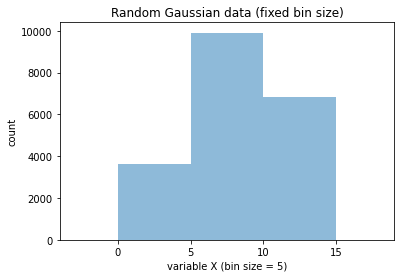

In [15]:
import numpy as np
import random
from matplotlib import pyplot as plt

data = len_ 

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

In [16]:
len(sorted(list(set(api_method_desc_list))))

25536